<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_03/Bootcamp_Mod3_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# **Análise de séries temporais**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 03 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

Neste módulo vamos descobrir o que são séries temporais e estudar suas particularidades.

Todo arcabouço teórico adquirido até aqui será aplicado para o entendimento das nuances envolvendo as séries temporais. Da estatística descritiva, passando pela análise exploratória e chegando às previsões, sempre de forma aplicada e prática utilizando ferramentas específicas para esse tipo de dados, como o **```StatsModel```** e **```Prophet```** desenvolvido pelo **Facebook**.

---

## **Aula 01 - Entendendo a Série Temporal**
---


### Aula 01 - Vídeo 01
Atividade 3 - Coleta de Dados e Primeiras Análises

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import datetime
import numpy as np
import statsmodels.tsa.api

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

import warnings
#warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12,6)

Para esse módulo vamos trabalhar com os dados relativos à epidemia de COVID-19 fornecidos pelo Governo do Estado de São Paulo. O material desse notebook está atualizado até o dia 17/junho/2021.

Fonte: [SEADE](https://www.seade.gov.br/coronavirus/)

In [3]:
url = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/dados_covid_sp-2021-06-17.zip?raw=true'

In [4]:
dados = pd.read_csv(url,
                    sep = ';',
                    compression = 'zip')

In [5]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

O *dataset* importado contém diversas colunas e informações de todos os municípios do Estado. O primeiro passo para podermos trabalhar com Séries Temporais e fazer o ***Python*** reconhecer que a coluna 'datahora' é composta por dados no formato **```datetime```**.

In [6]:
dados['datahora'] = pd.to_datetime(dados.datahora,
                                   format = '%Y-%m-%d')

Agora vamos plotar as informações de casos acumulados.

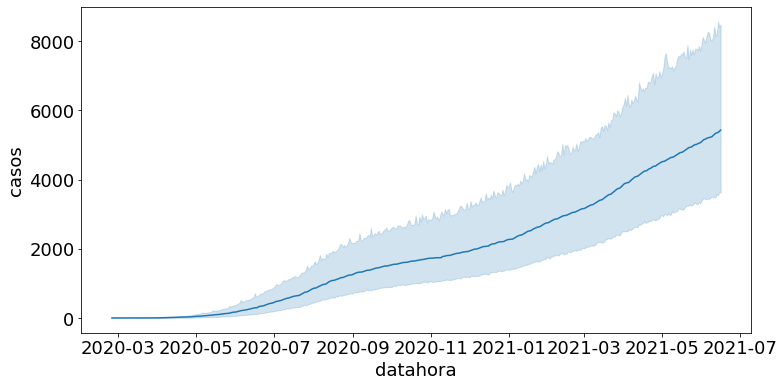

In [7]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos') # intervalo de confiança (ci) default é 95%

Podemos ver na linha azul a média de casos acumulados para os diversos municípios e na área azul mais clara, os valores dos municípios (com intervalo de confiança de 95%).

Vamos plotar também a informação com um intervalo de confiança de 100%, ou seja, considerando todos os dados.

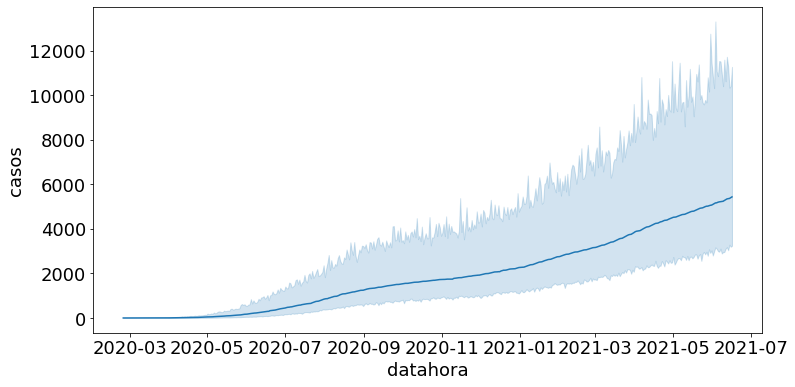

In [8]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos',
             ci=100)

Podemos ver que a área azul clara fica mais ampla e deslocada em relação à média. Isso indica que temos mais municípios menores, com poucos casos, puxando a média para baixo. Isso ocorre pois não há qualquer tipo de ponderação da quantidade de casos em relação ao tamanho da população de cada município.

Mesmo assim, podemos perceber o crescimento de casos ocorrendo de uma forma não-linear.

#######sdfsdfAAasdasdfggg**HIPÓTESE:** O crescimento de casos no estado de SP é exponencial.

Vamos começar traçando uma curva exponencial simples, a partir de dados gerados automaticamente.

In [9]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)

A partir dos dados de **x** e **y** gerados acima, vamos plotar uma curva exponencial.

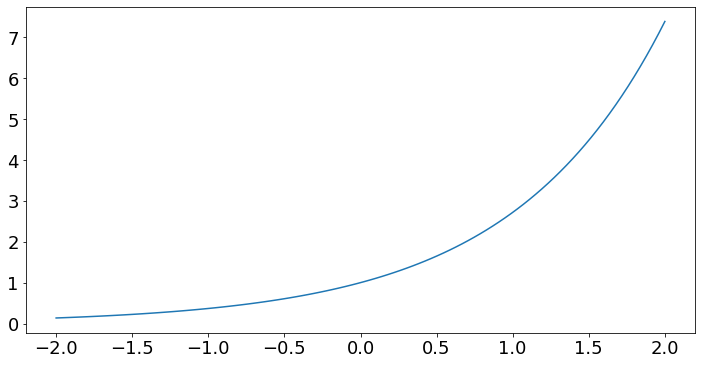

In [10]:
sns.lineplot(x = eixo_x,
             y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$


Se aplicarmos o logaritmo na escala do eixo **y**, veremos que a curva exponencial, para os mesmos dados, se torna uma reta.

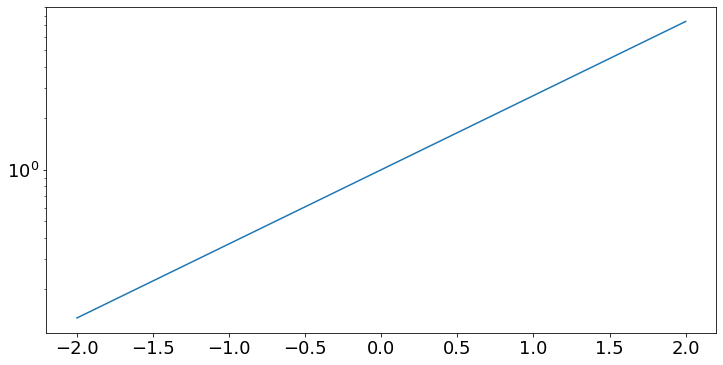

In [11]:
sns.lineplot(x = eixo_x,
             y = y_exp)
mpl.pyplot.yscale('log')

Sendo assim, uma forma de verificar se uma série de dados apresenta crescimento exponencial é usar uma escala logarítmica. Se a curva se aproximar de uma reta é porque temos um crescimento exponencial.

Vamos analisar o comportamento da cidade de São Paulo em relação a isso.

In [12]:
dados_spc = dados.query('nome_munic == "São Paulo"')
dados_spc.shape

(478, 26)

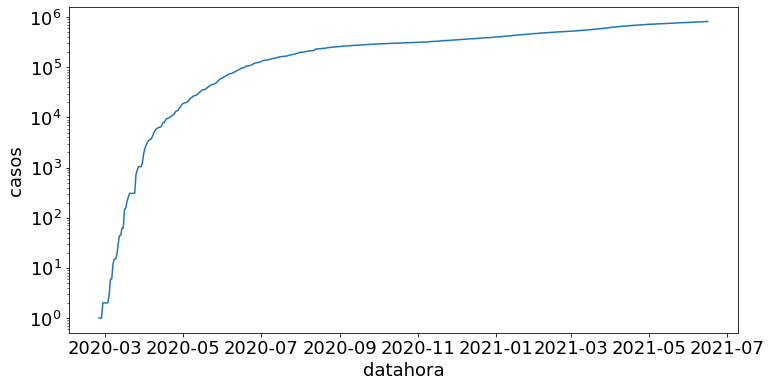

In [13]:
sns.lineplot(x = 'datahora',
             y = 'casos',
             data = dados_spc)
mpl.pyplot.yscale('log')

Apesar de não termos uma reta única, podemos ver pelo menos 3 segmentos de retas, com inclinações diferentes.

**RESPOSTA À HIPÓTESE:** A **hipótese** se confirma, o crescimento foi exponencial, apesar de ter ocorrido em 3 momentos diferentes, mudando a taxa de crescimento em cada ponto que altera a inclinação da reta.


<img src='https://drive.google.com/uc?id=1YgdKDm4xdkUkNl40Wx3JyJcEoIaWj8Hv'>

#### **Desafio - Filtrar a base para pegar o município de São Paulo sem usar a função ```query```**
---

Temos as alternativas abaixo para gerar o mesmo recorte no *dataset*.

In [14]:
df_sp = dados[(dados['nome_munic'] == 'São Paulo')]
df_sp.shape

(478, 26)

In [15]:
df_sp2 = dados.loc[(dados['nome_munic'] == 'São Paulo')]
df_sp2.shape

(478, 26)

#### **Desafio - Escolher outro município (do estado de SP ou não) para fazer a análise**
---


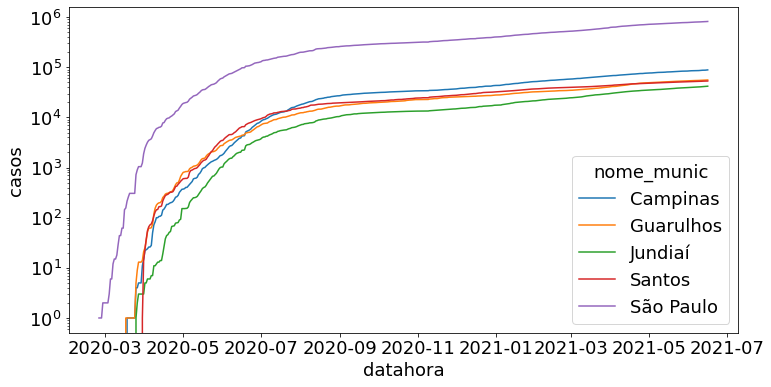

In [16]:
lista_cidades = ['São Paulo','Santos','Campinas','Jundiaí','Guarulhos']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]
sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Para fazer a análise do desafio, criei uma variável contendo a lista de cidades a ser plotada e escolhi algumas das maiores cidades do estado para fazer uma comparação sem perder muito da visualização em função da escala.

Apesar de estarmos lidando com grandezas diferentes, principalmente ao compararmos a cidade de São Paulo com as demais, podemos verificar que a curva de crescimento com 3 estágios ou diferentes inclinações é muito semelhante em todas elas.

A fase inicial, mais aguda, com rápida disseminação, durando 45 a 60 dias. Depois tivemos medidas de restrição da circulação das pessoas, reduzindo a velocidade de contágio, com 90 a 120 dias. Por último, a fase de crescimento com menor inclinação, que dura até hoje.

### Aula 01 - Vídeo 02
Atividade 4 - Taxa de Crescimento e Média Móvel

Até agora estávamos trabalhando com a variável 'casos', que nos apresentava os casos acumulados. Vamos passar a analisar agora os casos novos diários, através da coluna 'casos_novos'.

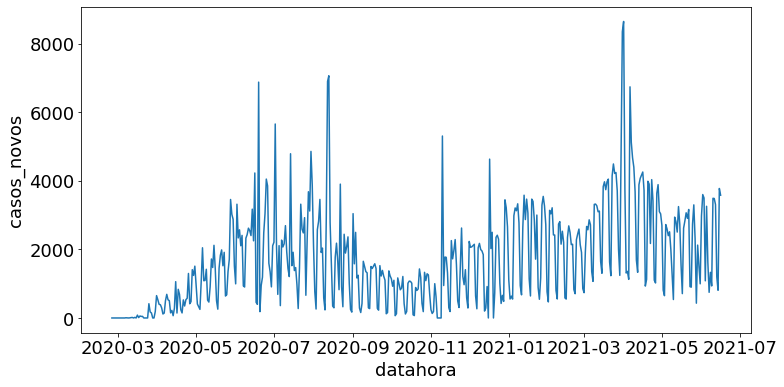

In [17]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)

Esse gráfico é mais "nervoso", a série de dados apresentada é mais caótica, com variações muito abruptas no dia a dia.

Para suavizar essas variações e nos possibilitar uma melhor análise, devemos fazer a **diferenciação** dos dados.

Vamos demonstrar o processo com um *DataFrame* de exemplo.

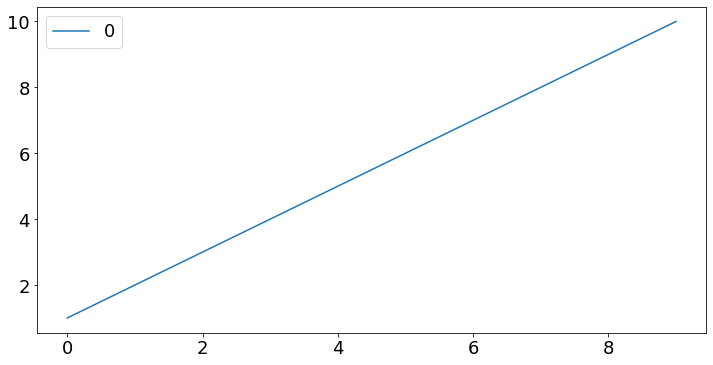

In [18]:
dados_exemplo = pd.DataFrame(
    data = np.linspace(1,10,10))

sns.lineplot(data = dados_exemplo)

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

dados_exemplo

0  diferenciado
0   1.0           NaN
1   2.0           1.0
2   3.0           1.0
3   4.0           1.0
4   5.0           1.0
5   6.0           1.0
6   7.0           1.0
7   8.0           1.0
8   9.0           1.0
9  10.0           1.0

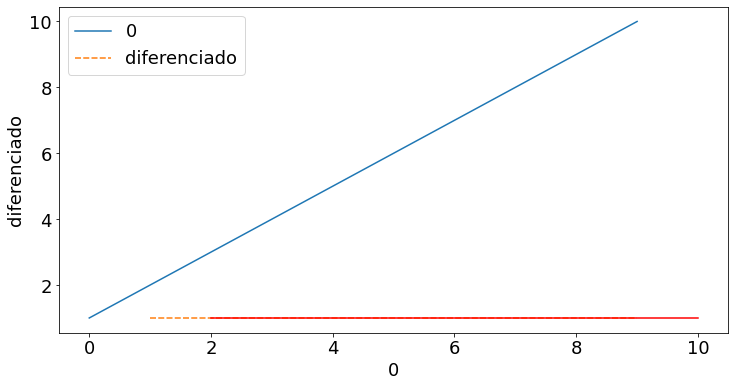

In [20]:
sns.lineplot(data = dados_exemplo)
sns.lineplot(data = dados_exemplo, x = 0, y = 'diferenciado', color = 'red')

Podemos observar que a linha vermelha, com os dados diferenciados, se torna uma reta horizontal. A **diferenciação** nada mais é do que a substituição do valor absoluto pela diferença entre o próprio e o seu valor anterior, ou seja, a taxa de crescimento dos dados.

Como a nossa reta (em azul) foi montada com os valores de 1 a 10 variando de 1 em 1, o valor da diferenciação (a partir do segundo ponto do gráfico) é sempre 1.

Vamos agora criar colunas em nossa base de dados com a taxa de crescimento de casos novos e de óbitos.

In [21]:
dados_spc['taxa_crescimento_casos'] = dados_spc['casos_novos'].diff()
dados_spc['taxa_crescimento_obitos'] = dados_spc['obitos_novos'].diff()

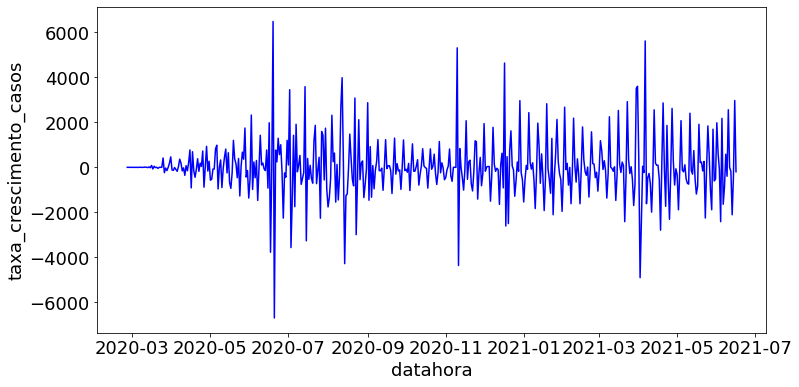

In [22]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')


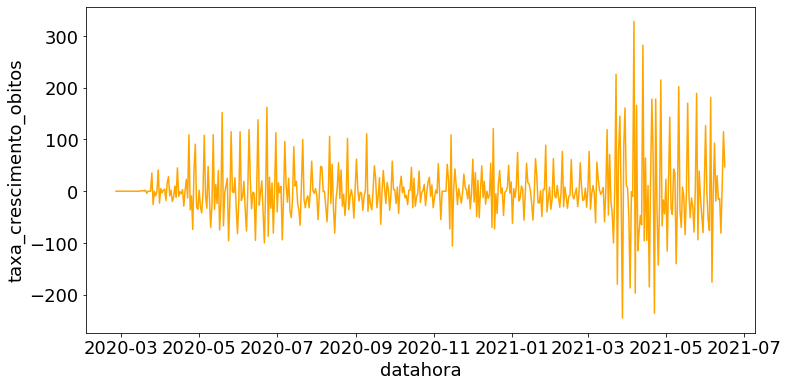

In [23]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

Podemos ver que os gráficos continuam "nervosos", com muitas oscilações no dia a dia e apresentando diversos picos.

#### **Desafio - Deixar o Notebook sem os** ***warnings***
---

Estou deixando os códigos comentados, por enquanto, para não ficar sem os *warnings*, mas a solução está abaixo.

In [24]:
#import warnings
#warnings.filterwarnings('ignore')

#### **Desafio - Verificar se o Pico da Taxa de Casos Novos Coincide com a Taxa de Óbitos Novos**
---


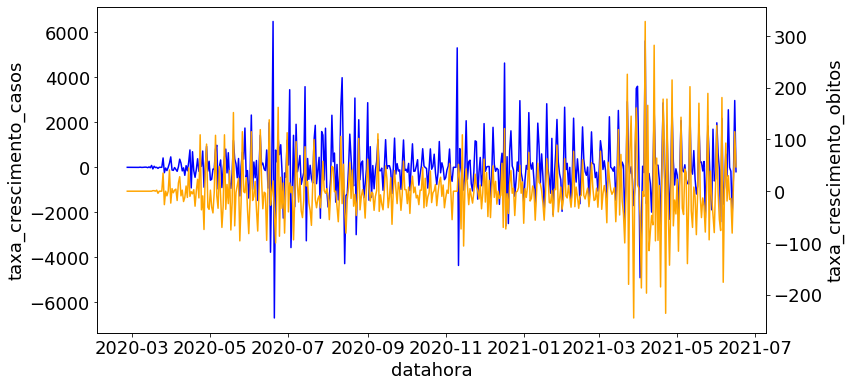

In [25]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')

plt.twinx()

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

Optei por trabalhar com um eixo **y** secundário para ficar mais fácil de visualizar as variações, já que usando um eixo único a escala praticamente impossibilita a visualização dos óbitos.

O pico de casos novos, em azul, ocorrido do final de junho/2020 não parece ter tido um impacto muito grande na taxa de óbitos (em laranja), bem como no pico do final de 2020.

Já o pico de abril a maio de 2021 parece ter tido mais impacto, deixando a taxa de óbitos com maior oscilação.

#### De volta para a aula...
---

Vamos colocar em um gráfico de barras para visualizar.

<BarContainer object of 478 artists>

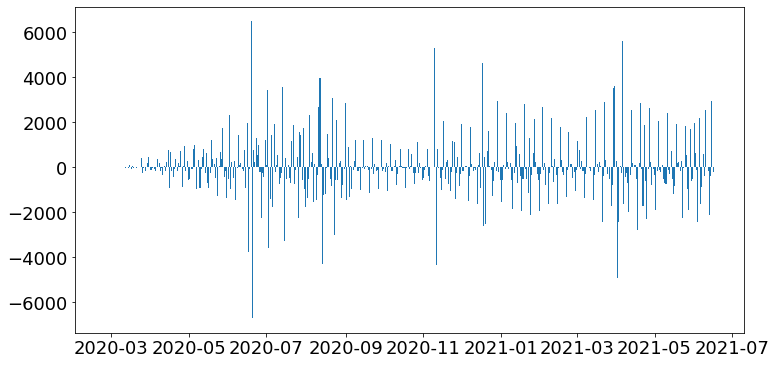

In [26]:
plt.bar(dados_spc['datahora'],dados_spc['taxa_crescimento_casos'])


A série de dados é muito extensa para ser analisada desta forma. Vamos aproveitar que temos uma coluna com dados em formato **```datetime```** e separar os dados de 2021 para analisar separadamente.

In [27]:
dados_spc['Ano'] = pd.DatetimeIndex(dados_spc['datahora']).year

In [28]:
dados_spc_2021 = dados_spc.query('Ano == 2021')

<BarContainer object of 167 artists>

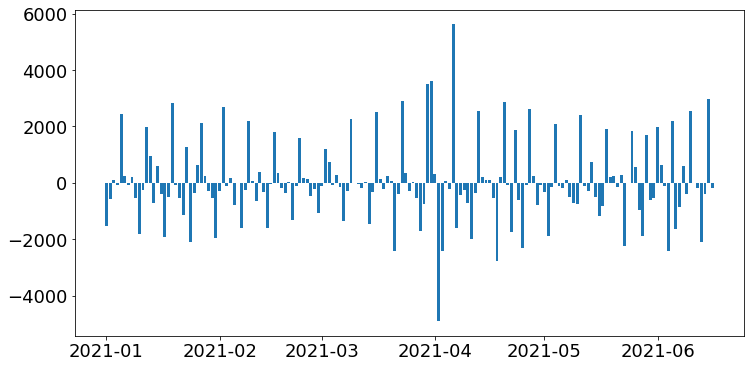

In [29]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_casos'])

<BarContainer object of 167 artists>

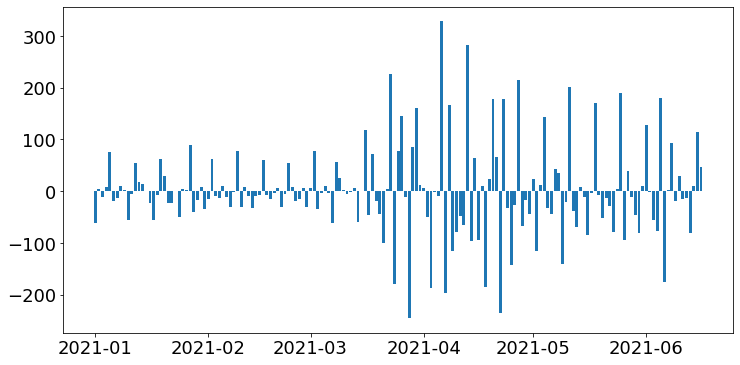

In [30]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_obitos'])

Tanto no caso dos casos novos quanto no caso dos óbitos podemos ver que os picos normalmente são antecedidos por dias com baixas quantidades de casos e óbitos.

Isso pode indicar algum tipo de represamento das informações que estão sendo fornecidas pelos municípios.

#### **Desafio - Deixar os gráficos mais bonitos**
---

Ajustar inclinação das *labels* do eixo **x**, colocar títulos, nomes dos eixos.

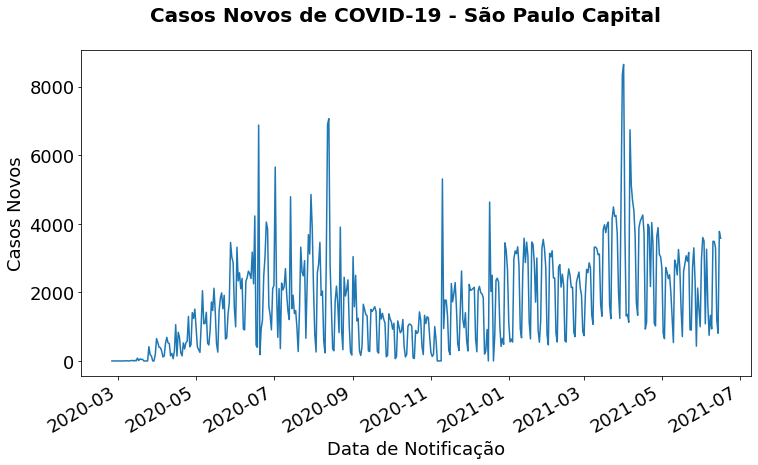

In [31]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data de Notificação')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

#### De volta para a aula...
---

Esses gráficos fazem parte do processo de análise mas normalmente não são mostrados para pessoas leigas.

Para mostrar o que está acontecendo, normalmente queremos passar uma ideia de tendências.

Vamos trabalhar com médias móveis, usando as informações dos casos novos somente para a cidade de São Paulo. Inicialmente vamos trabalhar com os dados de uma semana, ou seja, a média móvel de 7 dias.

In [32]:
dados_spc['Média Móvel Casos Novos'] = dados_spc['casos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
dados_spc['Média Móvel Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana


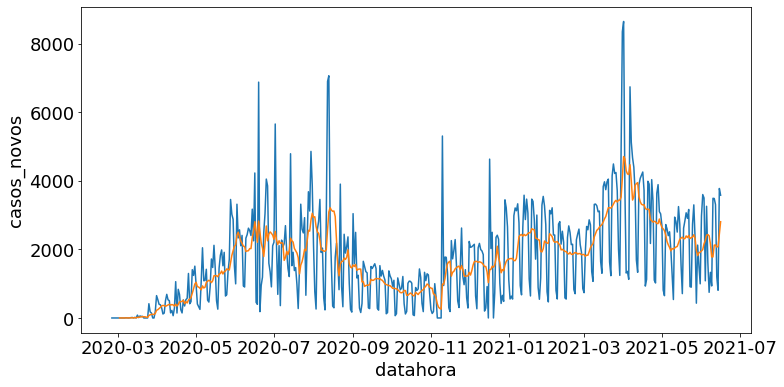

In [33]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc)

Visualizando no mesmo gráfico os casos novos e a média móvel de 7 dias podemos perceber que o uso da média suaviza a curva, reduzindo a quantidade de picos nas informações.

#### **Desafio - Gerar o Gráfico da Média Móvel de Óbitos e Mudar o Gráfico de Casos para Barras**
---

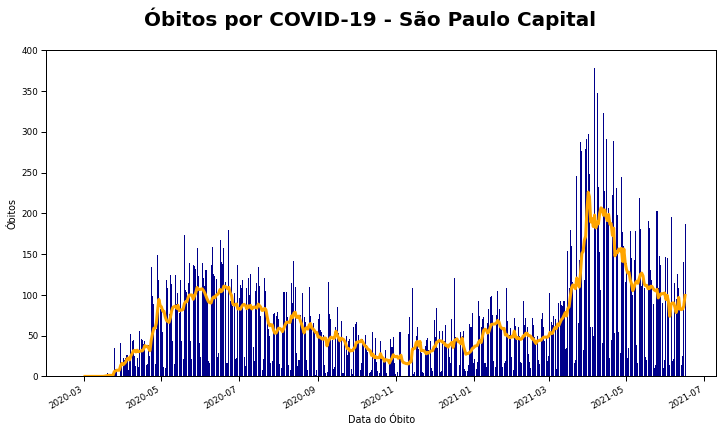

In [34]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Óbitos Novos',
             data = dados_spc,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_spc['datahora'],
        height = dados_spc['obitos_novos'],
        color = 'darkblue')

plt.ylim(0,400)
plt.suptitle('Óbitos por COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data do Óbito')
plt.ylabel('Óbitos')
plt.xticks(rotation=30,ha='right')
plt.show()

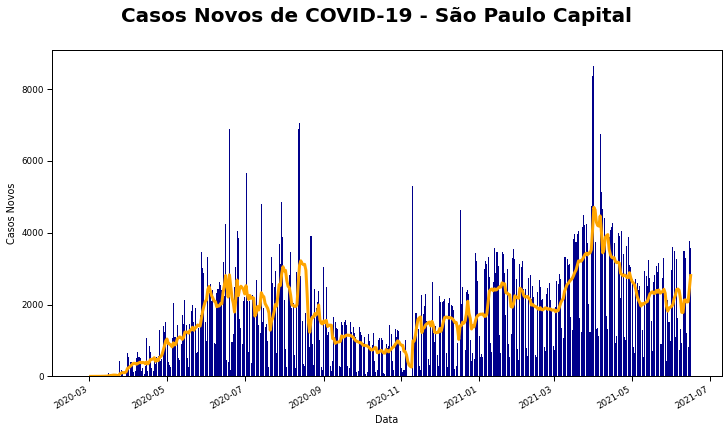

In [35]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_spc['datahora'],
        height = dados_spc['casos_novos'],
        color = 'darkblue')

#plt.ylim(0,400)
plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

#### **Desafio Extra - Gerar Gráficos de Casos Novos e Óbitos com a Média Móvel de 14 Períodos**
---

Resolvi gerar essas visualizações adicionais a título de curiosidade, para ver o quanto mais ficariam suavizadas as curvas dobrando a janela de média móvel para 14 dias.

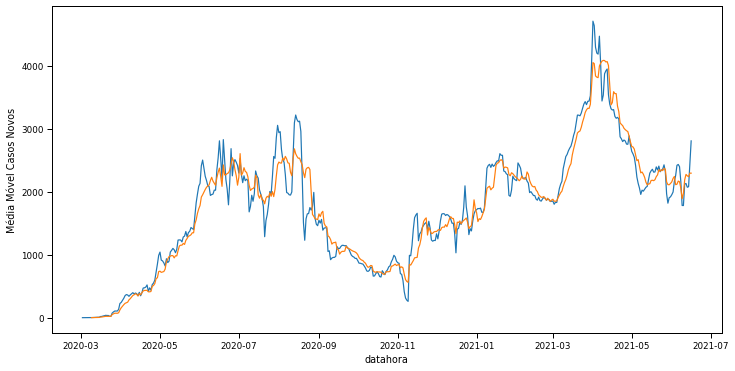

In [36]:
dados_spc['MM14 Casos Novos'] = dados_spc['casos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Casos Novos',
             data = dados_spc)

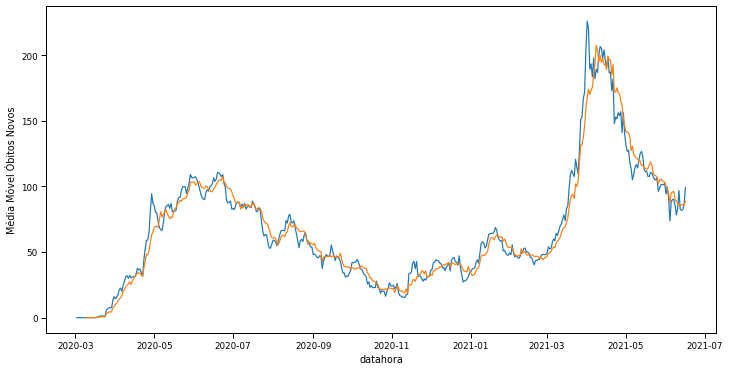

In [37]:
dados_spc['MM14 Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Óbitos Novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Óbitos Novos',
             data = dados_spc)

Como podemos ver, as linhas em laranja representando a média móvel de 14 períodos ficaram ainda mais suaves.

### Aula 01 - Vídeo 03
Atividade 5 - Correlação e Função de Autocorrelação

Para identificar sazonalidades, precisamos identificar a correlação entre períodos diferentes da nossa série temporal.

Vamos começar plotando a correlação mais óbvia, que seria da série com ela mesma.

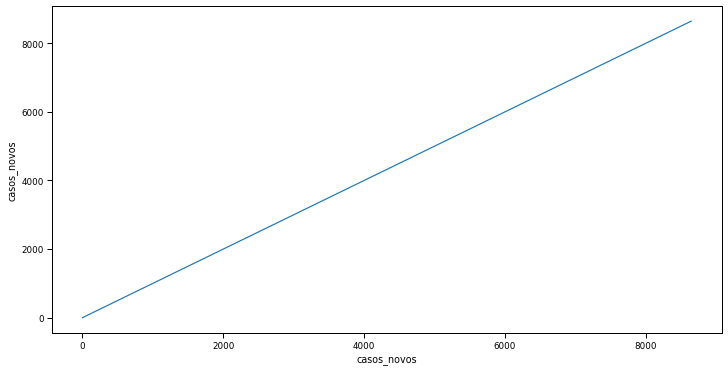

In [38]:
sns.lineplot(x = 'casos_novos',
             y = 'casos_novos',
             data = dados_spc)

Temos uma linha reta, na diagonal do gráfico, pois essa correlação dos dados com eles mesmos é forte, positiva e direta, ou seja, é igual a 1.

Vamos verificar se o número de casos novos é correlacionado ao número de óbitos.

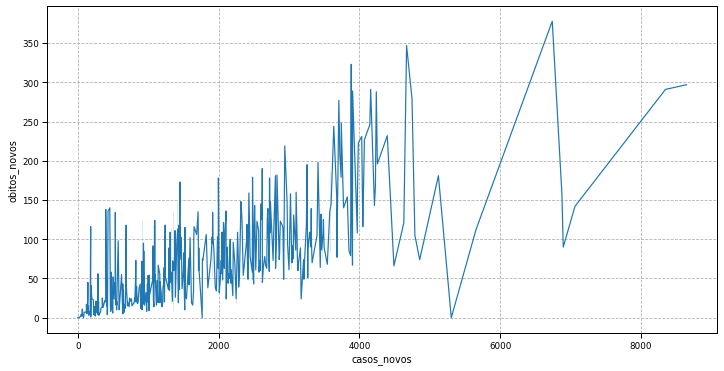

In [39]:
sns.lineplot(x = 'casos_novos',
             y = 'obitos_novos',
             data = dados_spc)

plt.grid(linestyle = '--')

plt.show()

Apesar de termos um início da série plotando o que seria uma tendência de linha diagonal, mais à direita do gráfico as linhas ficam mais erráticas e mostram não haver correlação entre as informações.

In [40]:
teste = sns.axes_style()
teste

{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

#### **Desafio - Mover o Número de Óbitos e Verificar se Altera a Correlação**
---

>Deslocando os dados de óbitos 14 dias para frente e 14 dias para trás em relação aos dados de casos novos, verificar se isso altera a correlação, deixando o gráfico mais parecendo uma reta.

---

Eu acho que deslocar os óbitos para frente não faz sentido, vale mais a pena testar mais janelas de dias para trás. Com isso vamos comparar os óbitos do dia **Z** com os casos do dia **Z - 14**, que é a relação mais provável, pois o paciente vai adoecer e, depois de um tempo, ou vai se curar ou vai falecer.

Pesquisando na internet, encontrei links que indicam o tempo médio entre os primeiros sintomas e o óbito variando entre 14 e 28 dias (links [aqui](https://www.cnnbrasil.com.br/saude/2021/03/24/tempo-medio-ate-morte-por-covid-19-em-utis-de-sp-caiu-4-dias-no-ultimo-trimestre) e [aqui](https://diariodonordeste.verdesmares.com.br/metro/tempo-medio-entre-inicio-de-sintomas-e-morte-por-covid-no-ceara-e-10-dias-maior-na-segunda-onda-1.3097493)).

Por isso vou gerar as colunas com os dados de óbitos antecipados em 14, 21 e 28 dias e verificar se existe uma correlação maior de alguma dessas séries com a quantidade de casos novos.

In [41]:
dados_spc['Óbitos -14'] = dados_spc['obitos_novos'].shift(-14)
dados_spc['Óbitos -21'] = dados_spc['obitos_novos'].shift(-21)
dados_spc['Óbitos -28'] = dados_spc['obitos_novos'].shift(-28)

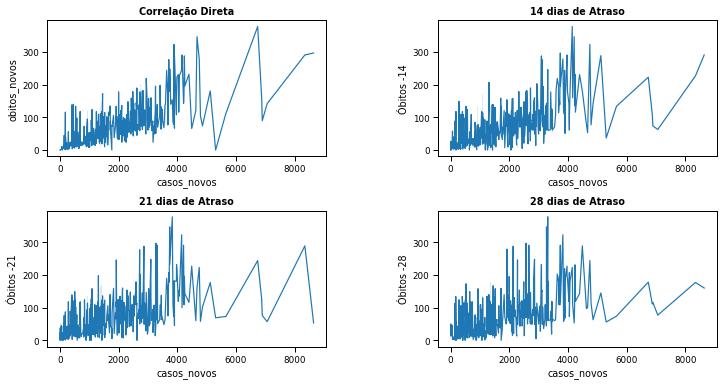

In [42]:
fig, ax = plt.subplots(nrows = 2,ncols=2)#,
                       #sharex = True, sharey = True)

ax[0,0] = sns.lineplot(x = 'casos_novos',
                       y = 'obitos_novos',
                       data = dados_spc,
                       ax = ax[0,0])
ax[0,0].set_title('Correlação Direta',fontweight='bold')

ax[0,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -14',
                       data = dados_spc,
                       ax = ax[0,1])
ax[0,1].set_title('14 dias de Atraso',fontweight='bold')

ax[1,0] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -21',
                       data = dados_spc,
                       ax = ax[1,0])
ax[1,0].set_title('21 dias de Atraso',fontweight='bold')

ax[1,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -28',
                       data = dados_spc,
                       ax = ax[1,1])
ax[1,1].set_title('28 dias de Atraso',fontweight='bold')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [43]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(0,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_spc['casos_novos']
    df_temp['obitos_desloc'] = dados_spc['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 0  -  0.7355456733962457
Menor --> 171  -  -0.2228306004435471


Não percebi diferenças significativas entre os gráficos, por isso resolvi rodar o código acima, analisando qual a maior e qual a menor correlação entre os casos novos e os óbitos deslocados.

A maior correlação seria uma relação direta, mais próxima de 1, enquanto a menor correlação, quanto mais próxima de -1 indicaria uma correlação inversa.

Rodei as iterações até metade da base, pois a partir daí a quantidade de dados começa a ficar menor e pode gerar falsos resultados.

O resultado obtido foi de que a maior correlação direta é mesmo dos dados originais, sem deslocamento algum. E a correlação inversa é muito fraca, sendo o resultado mais significativo obtido com o deslocamento de 171 dias.

#### De volta para a aula...
---

Em busca de identificar sazonalidades, vamos separar os dados dos meses iniciais do ano de 2021.

In [44]:
dados_spc['Mês'] = pd.DatetimeIndex(dados_spc['datahora']).month
dados_spc_202101 = dados_spc.query('Mês == 1 & Ano == 2021')
dados_spc_202102 = dados_spc.query('Mês == 2 & Ano == 2021')

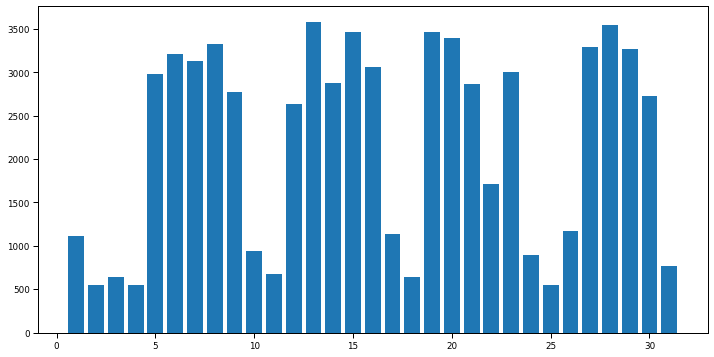

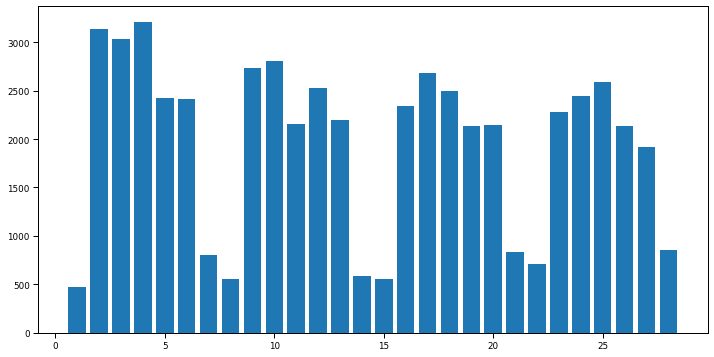

In [45]:
plt.bar(np.linspace(1,31,31),dados_spc_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dados_spc_202102['casos_novos'])
plt.show()

Podemos perceber um "padrão" de comportamento se repetindo semanalmente, tendo 5 dias (de 2ª à 6ª-feira) com elevado número de casos novos e 2 dias (final de semana) de baixa notificação. Isso é um tipo de sazonalidade.

Também podemos perceber que as baixas notificações também ocorrem em feriados.

Uma forma de identificar sazonalidades é através da autocorrelação, ou seja, a correlação da série de dados com ela mesma, deslocada de **X** períodos (ou ***lags***).

Vamos verificar isso em relação aos casos novos na cidade de São Paulo.

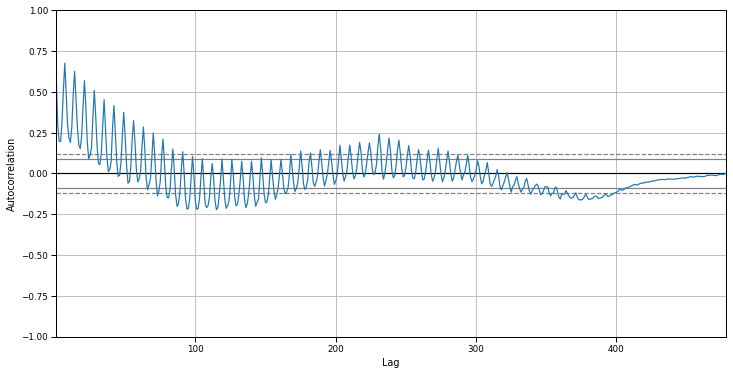

In [46]:
autocorrelation_plot(dados_spc['casos_novos'])

In [47]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(1,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_spc['casos_novos']
    df_temp['casos_desloc'] = dados_spc['casos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['casos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 7  -  0.6906857053369071
Menor --> 115  -  -0.28244365950838607


Também rodei o código que faz as iterações para identificar qual seria o ponto de maior e menor correlação. Para os casos novos, a maior correlação seria com um deslocamento de 7 dias e o menor valor seria com o deslocamento de 115 dias.

Aqui tive uma dificuldade, pois apesar do cálculo ter apontado -0.28, o gráfico em nenhum momento baixou de -0.25...

Vamos plotar, a título de exemplo, o que seria uma correlação para um conjunto aleatório de dados.

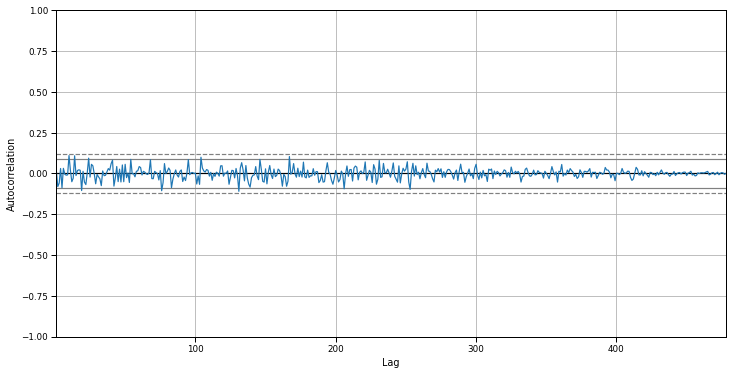

In [48]:
autocorrelation_plot(np.random.rand(dados_spc.shape[0]))

Vamos verificar também como se comporta a autocorrelação no número de óbitos.

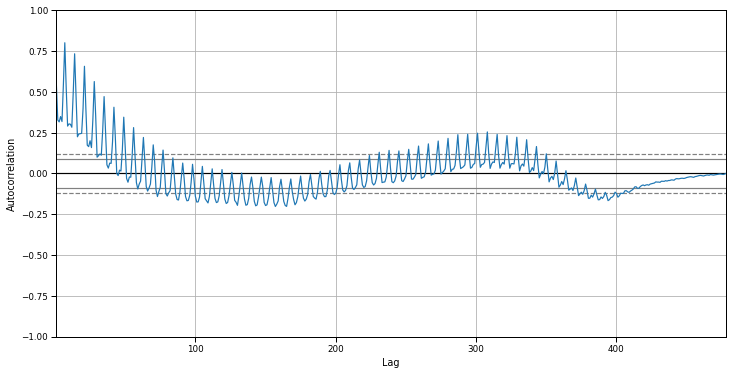

In [49]:
autocorrelation_plot(dados_spc['obitos_novos'])

In [50]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(1,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['obitos'] = dados_spc['obitos_novos']
    df_temp['obitos_desloc'] = dados_spc['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['obitos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 7  -  0.8143461393739687
Menor --> 165  -  -0.3903601997731131


Rodei novamente o código com as iterações e novamente tive dificuldade para entender o valor mínimo, que calculado é com deslocamento de 165 dias e é -0.39, enquanto no gráfico não tivemos nenhum ponto abaixo de -0.25...

#### **Desafio - Calcular a Correlação Cruzada dos Óbitos e Casos Novos**
---
>Usar a biblioteca **```StatsModels```**

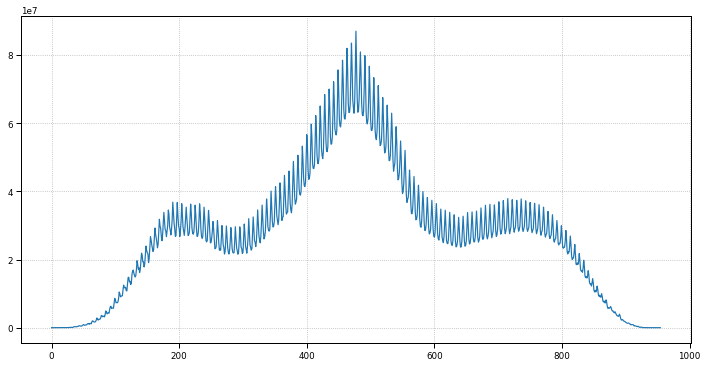

In [51]:
plt.plot(np.correlate(dados_spc['casos_novos'],
                      dados_spc['obitos_novos'],
                      mode = 'full'))
plt.grid(linestyle = 'dotted')

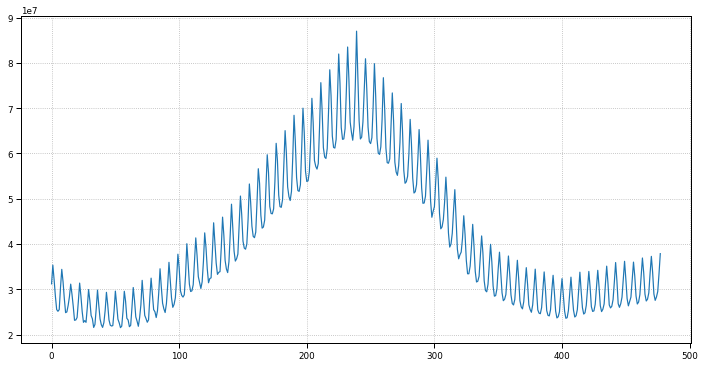

In [52]:
plt.plot(np.correlate(dados_spc['casos_novos'],
                      dados_spc['obitos_novos'],
                      mode = 'same'))
plt.grid(linestyle = 'dotted')

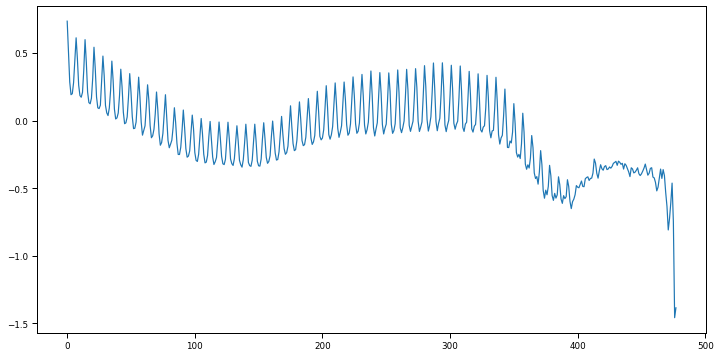

In [53]:
plt.plot(statsmodels.tsa.stattools.ccf(dados_spc['casos_novos'],
                                       dados_spc['obitos_novos'],
                                       True))
plt.show()

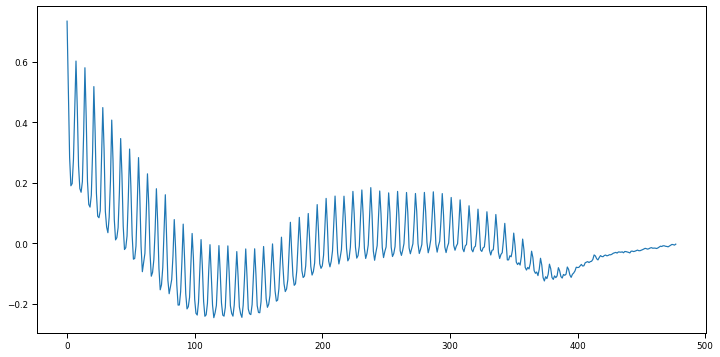

In [54]:
plt.plot(statsmodels.tsa.stattools.ccf(dados_spc['casos_novos'],
                                       dados_spc['obitos_novos'],
                                       False))
plt.show()

#### **Desafio - Escolher Outro Município e Refazer as Análises**
---

Vou tentar refazer a análise com um grupo de 3 municípios.

A ideia é pegar municípios semelhantes em termos de população. Vamos tentar com:
* Santos: 433.656 habitantes
* Diadema: 426.757 habitantes
* Jundiaí: 423.006 habitantes

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_S%C3%A3o_Paulo_por_popula%C3%A7%C3%A3o)

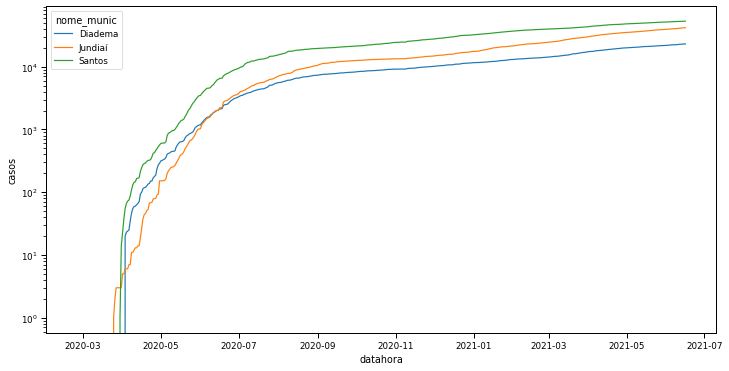

In [55]:
lista_cidades = ['Santos','Diadema','Jundiaí']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]

sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Apesar de termos um comportamento semelhante, podemos ver que a fase aguda de Jundiaí foi bem menor que as demais.

De forma geral, todas apresentaram uma curva em 3 estágios, como São Paulo Capital.

Vamos comparar as curvas de surgimento de casos novos.

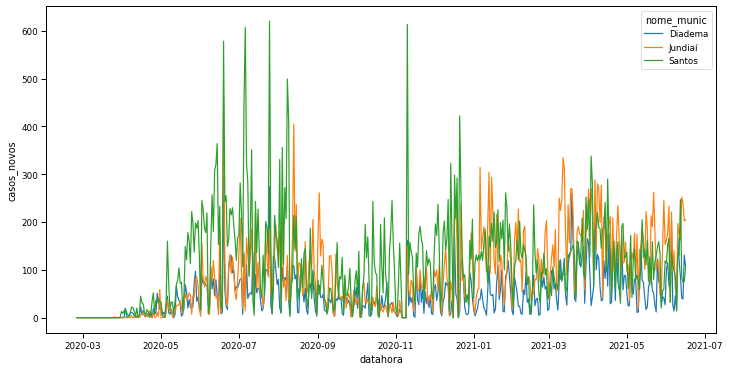

In [56]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_desafio,
             hue = 'nome_munic')

O gráfico com as linhas sobrepostas fica de difícil visualização. Vamos separar e colocar em gráficos lado a lado.

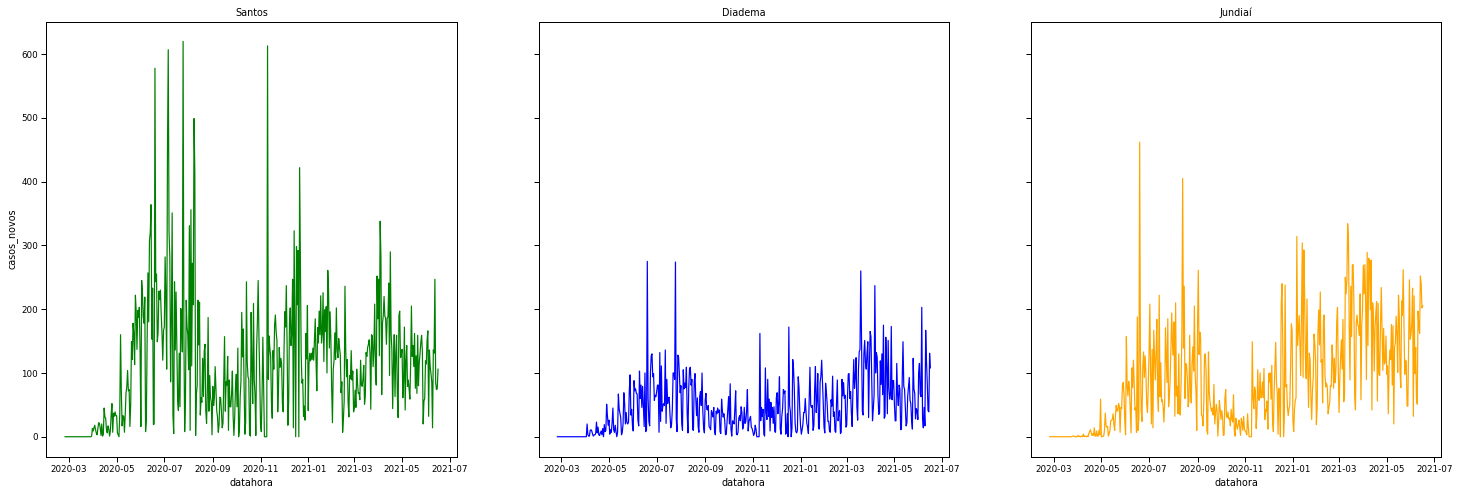

In [57]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
lista_cores = {'Diadema':'blue',
               'Jundiaí':'orange',
               'Santos':'green'}

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'casos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Apesar de estarmos lidando com cidades de populações similares, podemos verificar que o surgimento de casos novos apresentou picos muito maiores em Santos do que nas demais, sendo que Jundiaí já foi ligeiramene superior à Diadema.

In [58]:
colunas = dados.columns.to_list()
dados_desafio = pd.DataFrame(columns = colunas)

for i in lista_cidades:
    dados_temp = dados[(dados['nome_munic'] == i)]
    dados_temp['taxa_crescimento_casos'] = dados_temp[(dados_temp['nome_munic'] == i)]['casos_novos'].diff()
    dados_temp['taxa_crescimento_obitos'] = dados_temp[(dados_temp['nome_munic'] == i)]['obitos_novos'].diff()
    dados_desafio = dados_desafio.merge(dados_temp, how = 'outer')

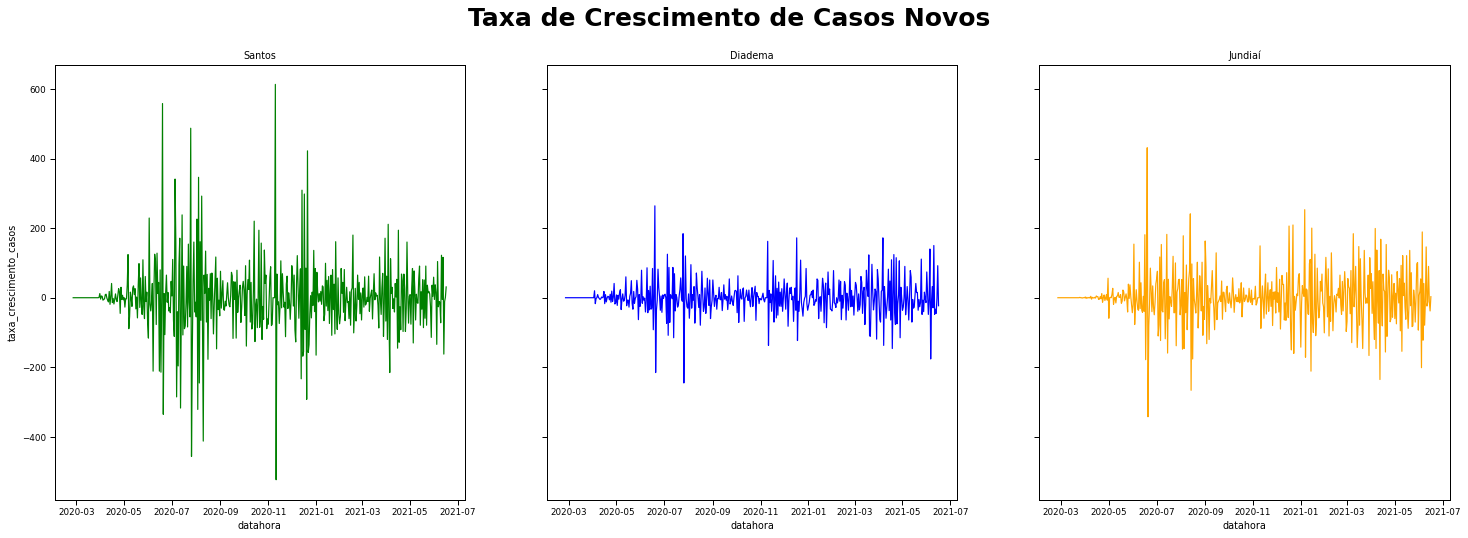

In [59]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Podemos observar que os picos de crescimento de casos em Santos se concentraram no início da pandemia, com um pico estranho no final do ano. Já o comportamento de Diadema e Jundiaí ficou semelhante, com Jundiaí em uma escala maior de valores.

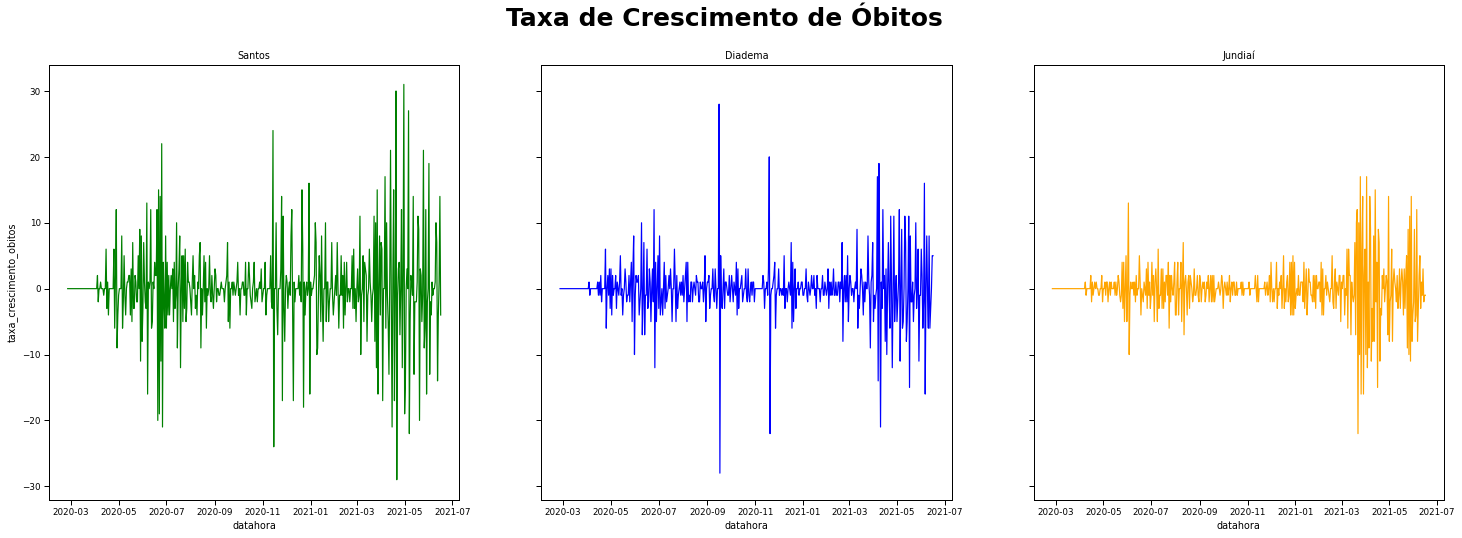

In [60]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Taxa de Crescimento de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A taxa de crescimento de óbitos apresenta uma variação maior no momento atual do que no início da pandemia. Jundiaí, nesse quesito, apresenta variações menores do que Diadema.

Santos sempre apresenta números maiores.

Chama a atenção alguns "*spikes*" nos números de Diadema, para ambos os lados (crescimento em um dia seguido de decréscimo no dia seguinte), o que parece significar retenção de notificações.

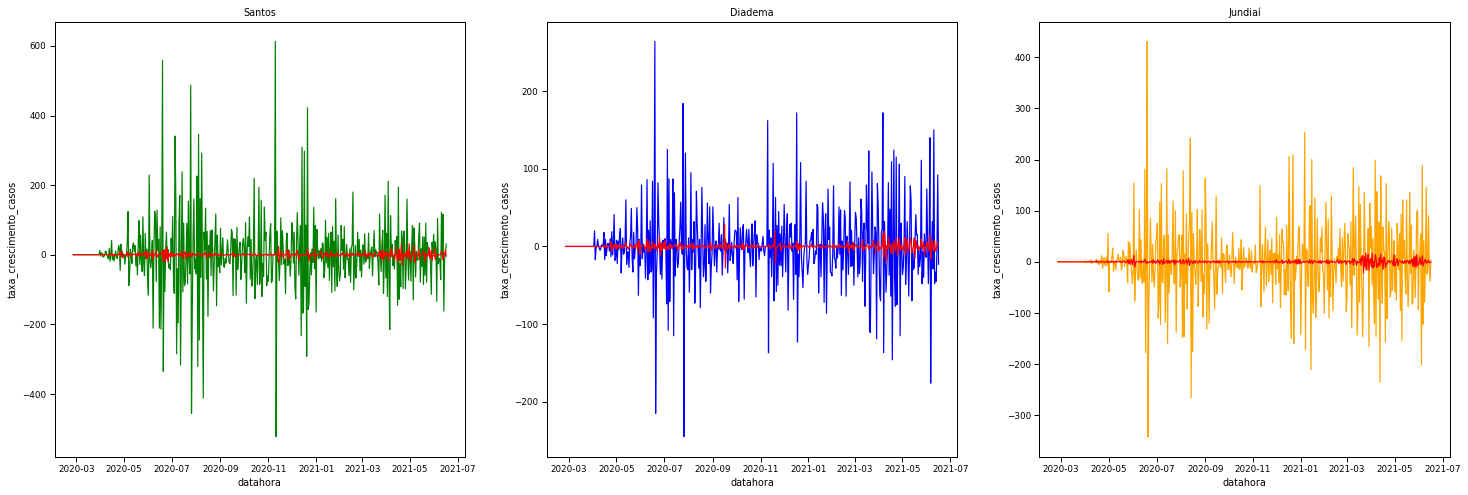

In [61]:
fig, ax = plt.subplots(ncols = 3,
#                       sharey = True,
                       figsize = (25,8))

eixo = 0
#fig.suptitle('Taxa de Crescimento de Casos Novos',
#             fontsize=25,
#             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_casos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
#    ax[eixo] = plt.twinx()
    ax[eixo] = sns.lineplot(x = 'datahora',
                     y = 'taxa_crescimento_obitos',
                     ax = ax[eixo],
                     color = 'red',
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo do que vimos quando analisamos São Paulo Capital, os óbitos não parecem ter uma relação direta com o surgimento de casos novos.

Temos maior ocorrência de óbitos no final da série, possivelmente relacionados ao surgimento de variantes mais agressivas do vírus e não à quantidade de casos.

Vamos analisar as correlações dos casos novos com os óbitos deslocados para ver se alguma cidade vai apresentar valores maiores do que os 0,7355 apresentados por São Paulo Capital.

In [62]:
for x in lista_cidades:
    i_maior_correl = 0
    maior_correl = 0
    i_menor_correl = 0
    menor_correl = 0

    for i in list(range(0,int(dados_desafio[(dados_desafio['nome_munic'] == x)].shape[0]/2),1)):
        df_temp = pd.DataFrame()
        df_temp['casos'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['casos_novos']
        df_temp['obitos_desloc'] = dados_desafio[(dados_desafio['nome_munic'] == x)]['obitos_novos'].shift(-i)
        df_temp.dropna(inplace=True)
        correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
        if correl[0,1] > maior_correl:
            maior_correl = correl[0,1]
            i_maior_correl = i
        elif correl[0,1] < menor_correl:
            menor_correl = correl[0,1]
            i_menor_correl = i
    print('\nCidade -->',x)
    print('Maior -->',i_maior_correl,' - ',maior_correl)
    print('Menor -->',i_menor_correl,' - ',menor_correl)



Cidade --> Santos
Maior --> 0  -  0.3073319197408088
Menor --> 95  -  -0.1425605033864871

Cidade --> Diadema
Maior --> 0  -  0.45449806037001655
Menor --> 193  -  -0.16367223217623994

Cidade --> Jundiaí
Maior --> 0  -  0.49715872144377327
Menor --> 167  -  -0.07061401461596245


As cidades escolhidas apresentaram correlações ainda mais fracas do que São Paulo Capital.

Só a título de curiosidade, vamos plotar os gráficos de correlação de casos novos e óbitos, sem deslocamento.

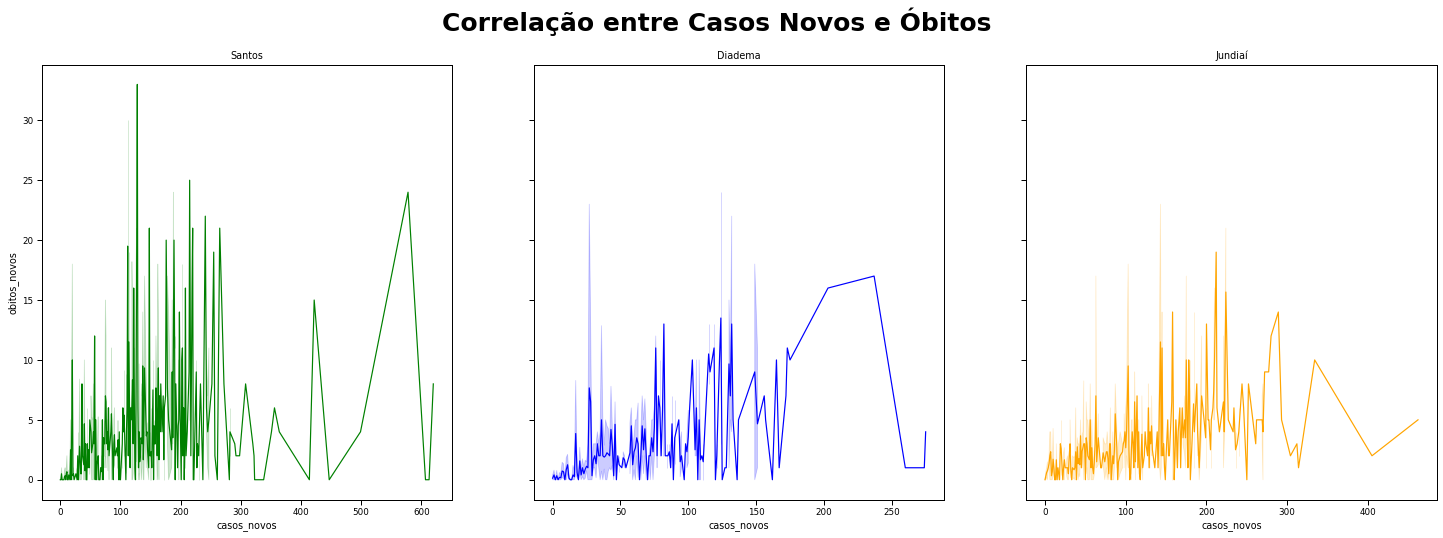

In [63]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Correlação entre Casos Novos e Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = sns.lineplot(x = 'casos_novos',
                     y = 'obitos_novos',
                     ax = ax[eixo],
                     color = lista_cores[i],
                     data = dados_desafio[(dados_desafio['nome_munic'] == i)])
    ax[eixo].set_title(i)
    eixo = eixo + 1

Vamos verificar também se alguma das cidades apresentou indício de sazonalidade, pela autocorrelação da série de casos novos.

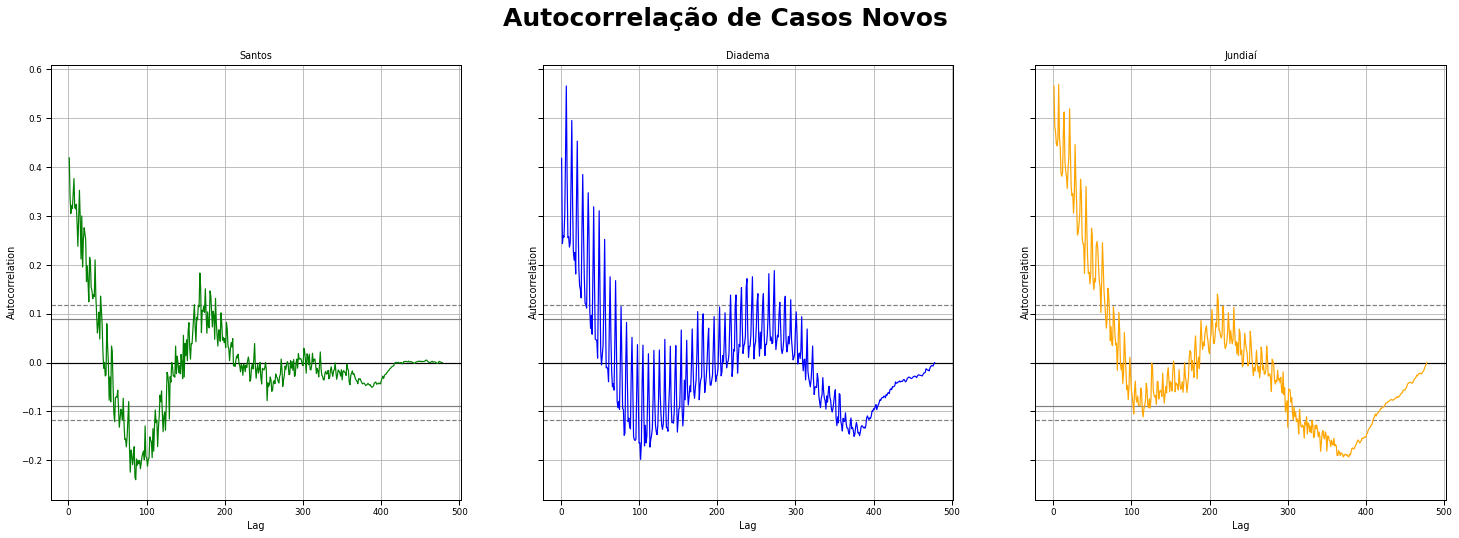

In [64]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Casos Novos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['casos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

A exemplo de São Paulo, não podemos verificar nenhum tipo de sazonalidade significativa.

Vamos verificar a autocorrelação da série de óbitos.

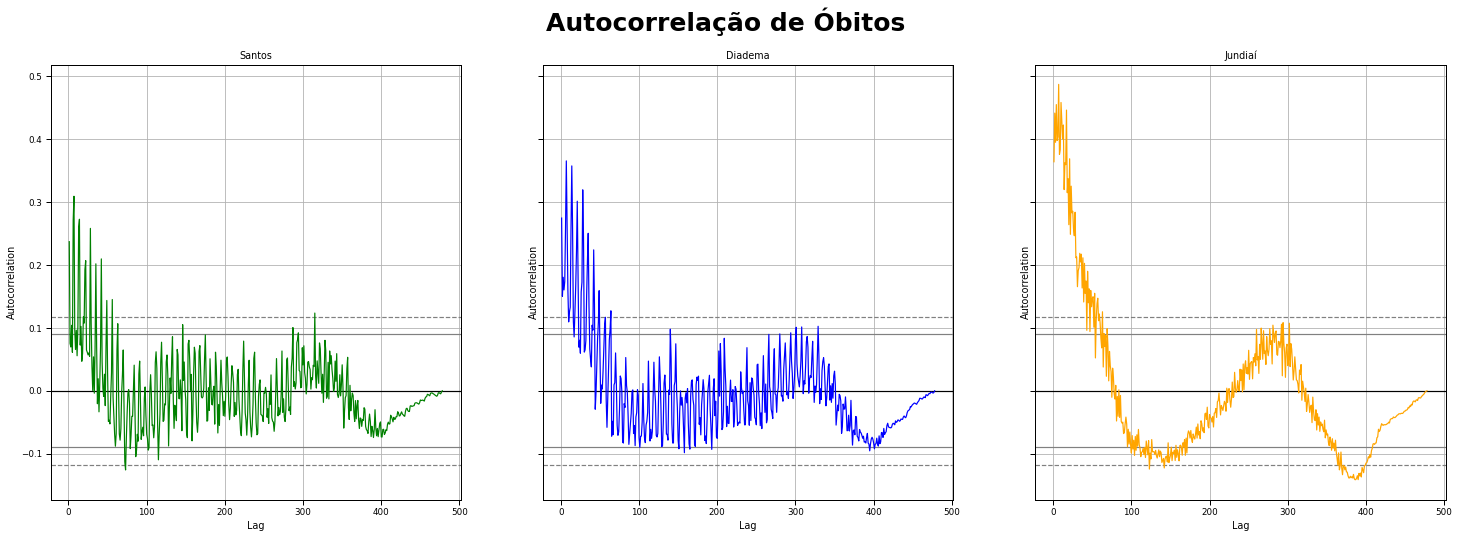

In [65]:
fig, ax = plt.subplots(ncols = 3,
                       sharey = True,
                       figsize = (25,8))

eixo = 0
fig.suptitle('Autocorrelação de Óbitos',
             fontsize=25,
             fontweight = 'bold')

for i in lista_cidades:
    ax[eixo] = autocorrelation_plot(dados_desafio[(dados_desafio['nome_munic'] == i)]['obitos_novos'],
                                    ax = ax[eixo],
                                    color = lista_cores[i])
    
    ax[eixo].set_title(i)
    eixo = eixo + 1

As cidades escolhidas também não apresentaram sinais de sazonalidade em relação à série de óbitos.

O mais estranho para mim é que, no meu entendimento, para um ***lag = 0*** a autocorrelação deveria ser igual a 1, mas isso não está acontecendo.

### **O que aprendemos nessa aula?**
---

>* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.

---
* Preciso entender melhor a questão do funcionamento do **```autocorrelation_plot```**, principalmente o real significado dos *lags*.

Eu entendi que são os diferentes deslocamentos da série de dados que são feitos para verificar a correlação, mas é melhor confirmar. Achei o resultado muito rápido para ser isso, que deveria ser bem mais complexo.

## **Aula 02 - Primeiras Previsões**
---


### Aula 02 - Vídeo 01 - Primeiras Previsões com o Prophet

O **Prophet**, ou **Facebook Prophet** é uma biblioteca criada pela divisão de pesquisa do **Facebook** e lançada em fevereiro de 2017.

É uma ferramenta *Open Source* (de código aberto, [link](https://github.com/facebook/prophet)) específica para previsões de séries temporais e está disponível para ***Python*** e ***R***, outra linguagem também muito usada para ciência de dados.

Tem uma sintaxe muito simples e intuitiva, sem por isso ser menos poderosa.

Vamos importá-la para o nosso projeto.

In [66]:
from fbprophet import Prophet

Para podermos usar o **Prophet** em nosso estudo, precisamos deixar os dados padronizados, como a ferramenta espera recebê-los.

O *input* esperado pelo **Prophet** é na forma de um *DataFrame* com duas colunas:
* **```ds```** onde teremos a série temporal
* **```y```** onde teremos a série de dados que temos e que iremos prever

Vamos partir de nossa base que contém somente os dados de São Paulo Capital para esse trabalho inicial. Os dados que iremos prever serão os de casos novos de COVID-19.

In [67]:
df = pd.DataFrame()
df['ds'] = dados_spc['datahora']
df['y'] = dados_spc['casos_novos']
df.head()

ds  y
562  2020-02-25  0
1207 2020-02-26  0
1852 2020-02-27  0
2497 2020-02-28  1
3142 2020-02-29  0

Com o *DataFrame* preparado, precisamos criar o modelo que será trabalhado. O primeiro passo é atribuí-lo a uma variável, depois, já usando as funções da biblioteca, pedir que seja feito o **```fit```** do modelo ao nosso *DataFrame*.

In [68]:
modelo = Prophet()
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


O modelo já percebeu, inicialmente, a inexistência de sazonalidades anuais e diárias.

De maneira simplista, o que foi feito foi a criação de uma equação ou algoritmo baseado nos pontos que passamos para o **Prophet**.

Agora vamos estabelecer o período que desejamos prever. Inicialmente vamos colocar 30 dias.

In [69]:
df_futuro = modelo.make_future_dataframe(periods=30)
df_futuro.tail()

ds
503 2021-07-12
504 2021-07-13
505 2021-07-14
506 2021-07-15
507 2021-07-16

A função **```make_future_dataframe```** cria um *DataFrame* com as datas que já estão no modelo e adiciona os períodos indicados ao final.

Vamos agora solicitar que ele calcule a previsão para esse período futuro.

In [70]:
previsao = modelo.predict(df_futuro)
previsao.tail()

ds        trend  ...  multiplicative_terms_upper         yhat
503 2021-07-12  3113.039334  ...                         0.0  1950.146800
504 2021-07-13  3119.636567  ...                         0.0  3614.858220
505 2021-07-14  3126.233800  ...                         0.0  3684.471131
506 2021-07-15  3132.831033  ...                         0.0  3786.197167
507 2021-07-16  3139.428265  ...                         0.0  3477.115446

[5 rows x 16 columns]

O *DataFrame* criado é bem complexo, com várias colunas de dados. Vamos exibí-lo graficamente para ver qual foi o resultado.

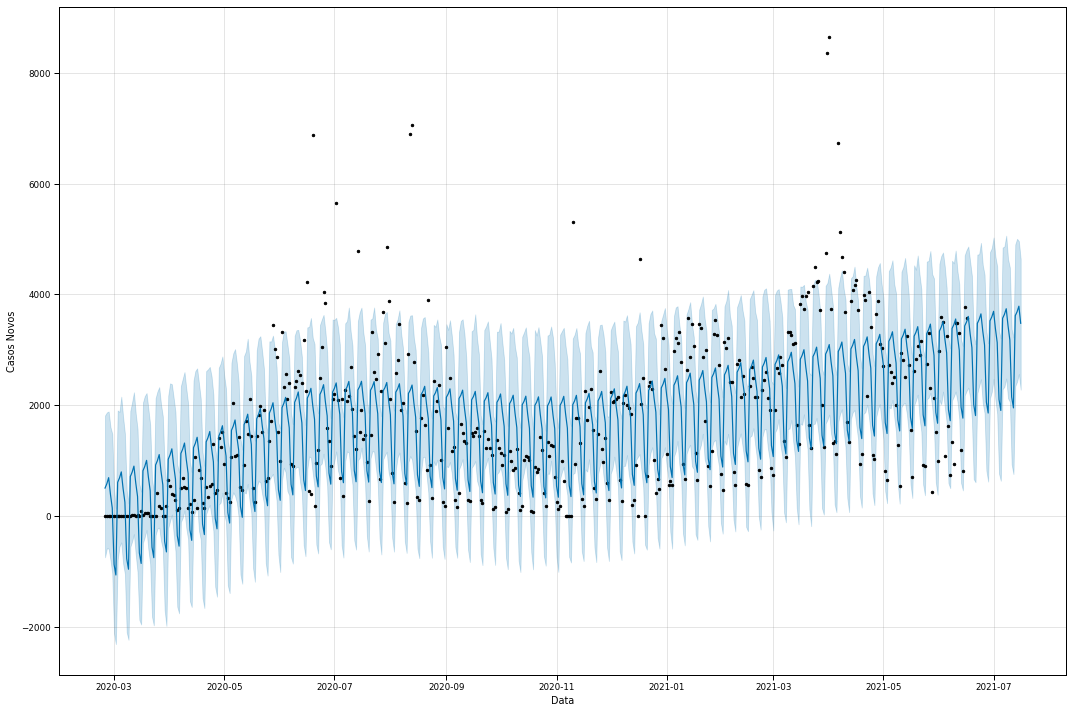

In [71]:
modelo.plot(previsao,
            xlabel = 'Data',
            ylabel = 'Casos Novos',
            figsize = (15,10));

Temos no gráfico diversas informações, com a série temporal no eixo **X** e o número de casos no eixo **Y**.

A partir disso, temos:
* os pontos pretos são os dados reais;
* a curva azul escura é o modelo ajustado;
* a sombra azul é o intervalo de confiança

Podemos perceber que o modelo percebeu uma sazonalidade semanal, por isso que a curva está fazendo esse ciclo regularmente.

Não temos, no entanto, como verificar a acuracidade do modelo calculado sem aguardar os próximos dias.

Para evitar isso normalmente dividimos os dados que já temos em dados de treino e dados de teste.

Os **dados de treino** são aqueles que iremos submeter ao processo de elaboração do modelo, enquanto os **dados de teste** serão utilizados para verificar se o modelo atingiu a acurácia desejada.

Uma prática é dividir os dados que temos em uma proporção de 70% para treino e 30% para testes. No caso atual, vamos gerar um novo *DataFrame* separando os primeiros 400 dias para treino e rodar todo o processo de construção do modelo e geração da previsão novamente.

In [72]:
df_2 = pd.DataFrame()
df_2['ds'] = dados_spc['datahora'][:400]
df_2['y'] = dados_spc['casos_novos'][:400]
df_2.tail()

ds     y
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

In [73]:
modelo = Prophet()
modelo.fit(df_2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
dados_spc.shape[0]

478

Como nossos dados abrangem 478 dias e já utilizamos 400 dias para o treino, vamos pedir a previsão dos 78 dias seguintes.

In [75]:
df_futuro_2 = modelo.make_future_dataframe(periods=(dados_spc.shape[0]-400))
df_futuro_2.tail()

ds
473 2021-06-12
474 2021-06-13
475 2021-06-14
476 2021-06-15
477 2021-06-16

In [76]:
previsao_2 = modelo.predict(df_futuro_2)
previsao_2.tail()

ds        trend  ...  multiplicative_terms_upper         yhat
473 2021-06-12  3583.351547  ...                         0.0  3642.466342
474 2021-06-13  3594.377665  ...                         0.0  2726.196290
475 2021-06-14  3605.403784  ...                         0.0  2563.049533
476 2021-06-15  3616.429902  ...                         0.0  4074.129254
477 2021-06-16  3627.456021  ...                         0.0  4084.315963

[5 rows x 16 columns]

Com a previsão feita, vamos separar os dados dos 78 dias restantes em um *DataFrame* específico para poder visualizar como o modelo de previsão se ajusta aos dados reais que tivemos.

In [77]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_spc['datahora'][400:]
df_teste['y'] = dados_spc['casos_novos'][400:]

Agora vamos visualizar graficamente como a projeção ficou em relação aos pontos reais (em vermelho).

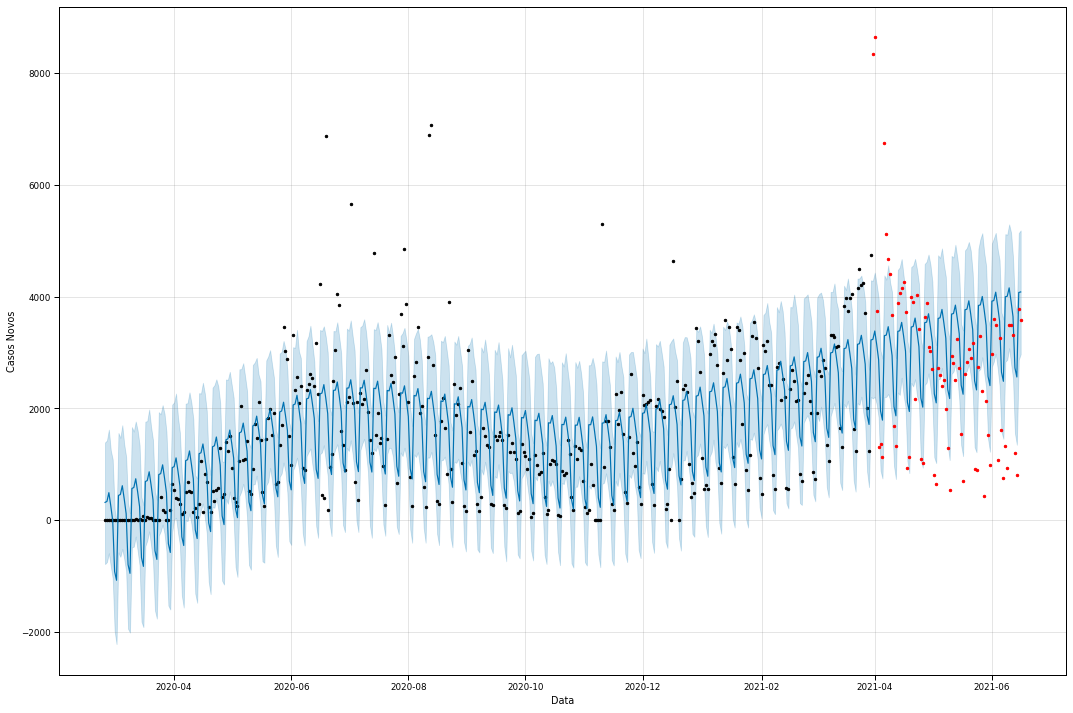

In [78]:
modelo.plot(previsao_2,
            xlabel = 'Data',
            ylabel = 'Casos Novos',
            figsize = (15,10));
plt.plot(df_teste['ds'],
         df_teste['y'],
         '.r')

Como podemos ver, praticamente todos os pontos vermelhos estão fora da curva, esse modelo ainda precisa melhorar muito.

Vamos visualizar os componentes da previsão feita pelo **Prophet**.



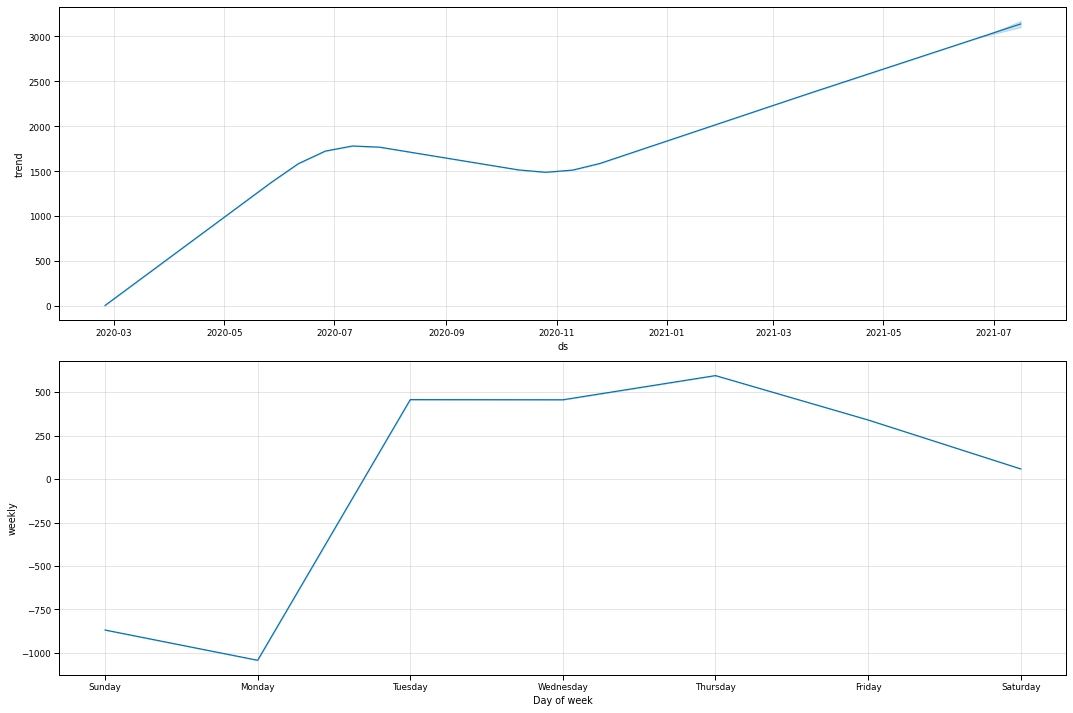

In [79]:
modelo.plot_components(previsao,
                       figsize = (15,10));

O primeiro gráfico mostra a tendência macro, enquanto o segundo nos mostra a sazonalidade semanal que foi percebida pelo modelo.

#### **Desafio - Mudar os Períodos de Previsão**
---



A exemplo do que alguns colegas fizeram, vou criar uma função de previsão que trabalha com o *dataset* inteiro, transformando parte dos dados em treino e o restante em teste.

O único parâmetro vai ser a quantidade de dias de previsão que queremos deixar e o resultado vai ser a plotagem dos gráficos.

In [80]:
def projecao(dias: int):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = dados_spc['datahora'][:(dados_spc.shape[0] - dias)]
    df_desafio['y'] = dados_spc['casos_novos'][:(dados_spc.shape[0] - dias)]
    modelo_desafio = Prophet()
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = dados_spc['datahora'][(dados_spc.shape[0] - dias):]
    df_desafio_teste['y'] = dados_spc['casos_novos'][(dados_spc.shape[0] - dias):]
    modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = 'Casos Novos',
                        figsize = (15,10));
    plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
#    modelo_desafio.plot_components(prev_desafio)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


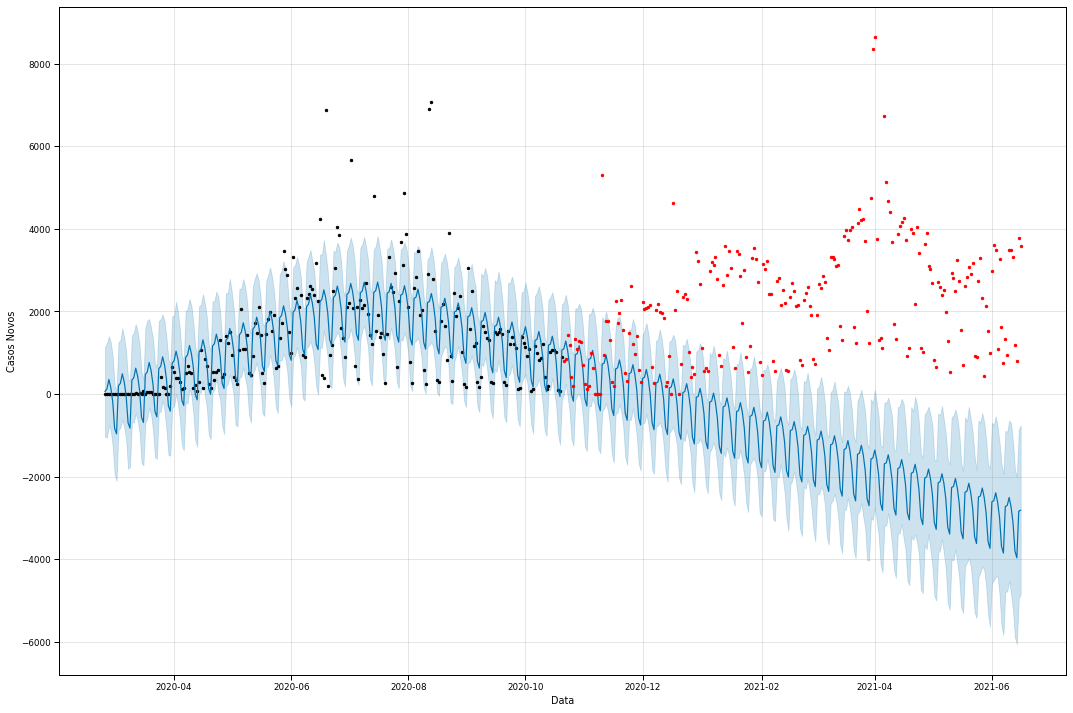

In [81]:
teste_50 = int(dados_spc.shape[0]*.50)
projecao(teste_50)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


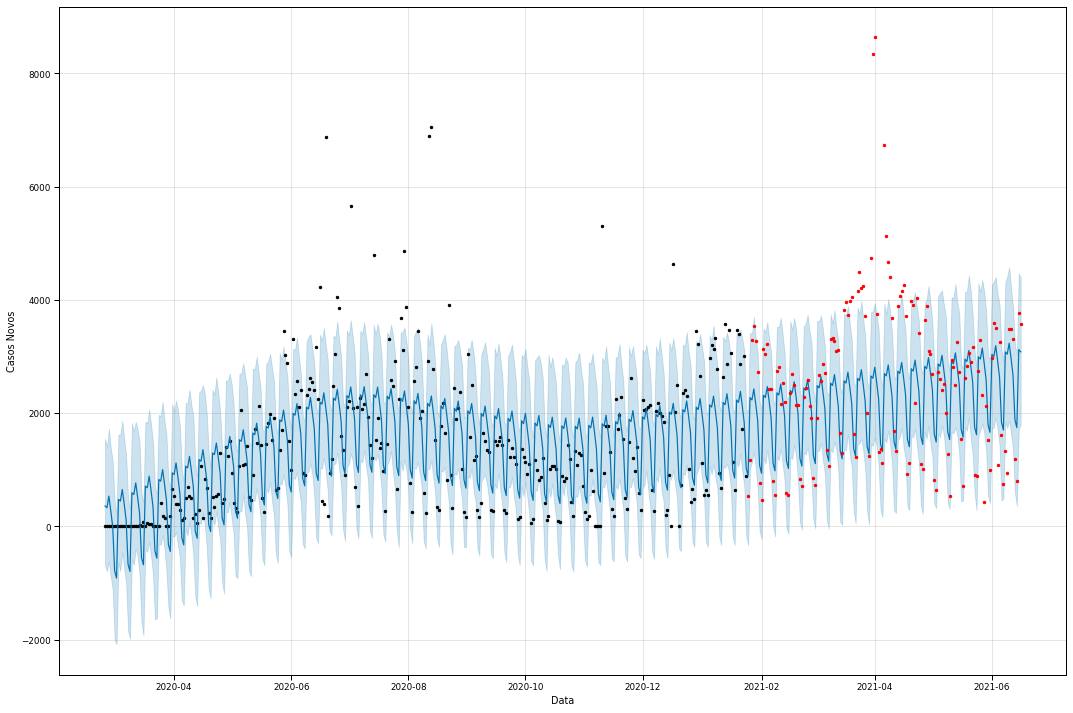

In [82]:
regra_70_30 = int(dados_spc.shape[0]*.30)
projecao(regra_70_30)

Aplicando a regra dos 70/30 (70% dos dados para treino e 30% para teste) temos uma boa quantidade dos dados dentro do nosso intervalo de confiança, mas ainda temos muitos pontos fora, indicando a necessidade de melhorarmos nosso modelo.

Também fiz um teste "extremo", colocando uma projeção de metade da base. É interessante perceber as características que o modelo passa a apresentar:
* número negativo de casos novos a partir de novembro/2020, o que não pode ocorrer;
* com isso os pontos vermelhos (reais) passam a ficar praticamente todos fora da área de confiança, completamente errados;
* aumenta a área azul na parte direita do gráfico, indicando uma necessidade de ampliar o *range* máximo e mínimo para manter dentro do intervalo de confiança.

#### **Desafio - Estudar documentação do** ***Prophet***
---



Temos o *Quick Start* [aqui](https://facebook.github.io/prophet/docs/quick_start.html#python-api), onde podemos ver que os passos iniciais são muito semelhantes ao que aplicamos nesta aula.

Achei muito interessante a possibilidade de usar bibliotecas adicionais para gerar gráficos interativos, que nos permitem analisar melhor pontos específicos dos gráficos.

In [83]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo, previsao)

In [84]:
plot_components_plotly(modelo, previsao)

#### **Desafio - Melhorar os Gráficos Gerados Automaticamente**
---




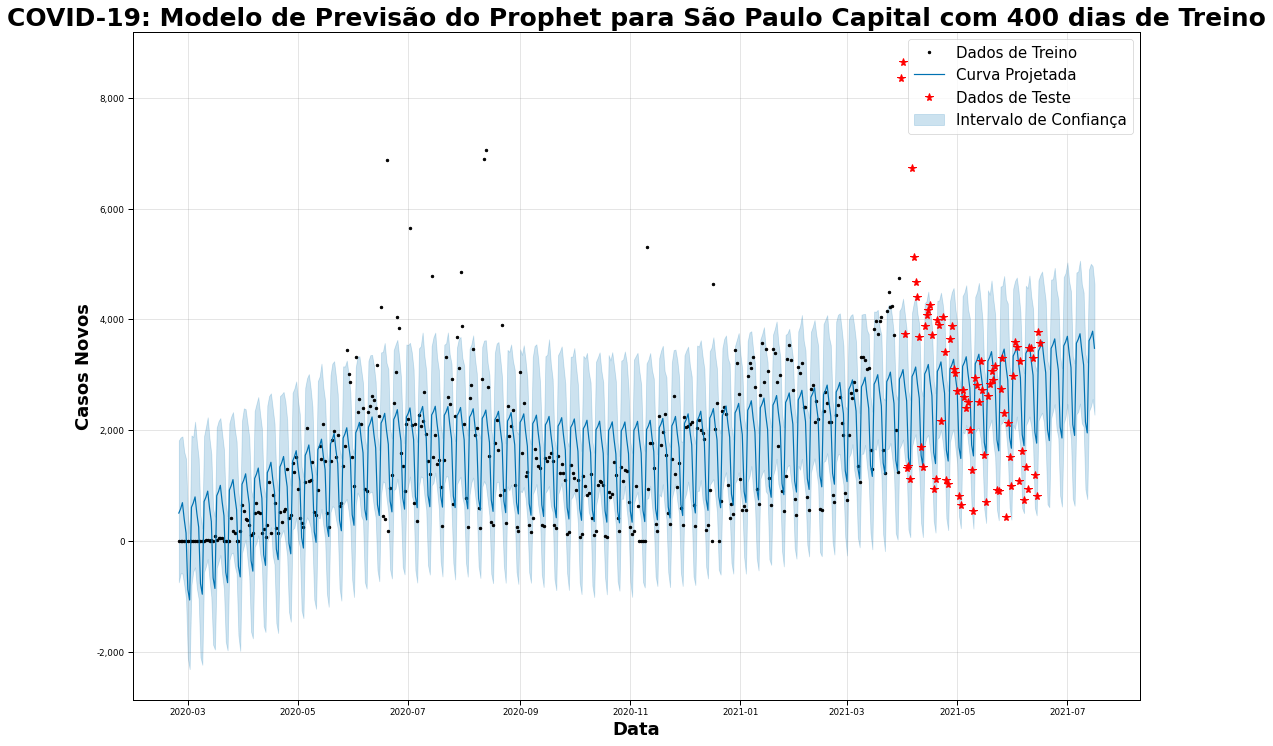

In [85]:
grafico = modelo.plot(previsao, figsize=(15,10));
plt.plot(df_teste['ds'],df_teste['y'], '*r', markersize = 8)
plt.title('COVID-19: Modelo de Previsão do Prophet para São Paulo Capital com 400 dias de Treino',
          fontsize = 25,
          fontweight = 'bold')
plt.legend(labels=['Dados de Treino','Curva Projetada','Dados de Teste','Intervalo de Confiança'],
           fontsize = 15)
eixo = grafico.get_axes()
eixo[0].set_xlabel('Data', fontsize=18, fontweight='bold')
eixo[0].set_ylabel('Casos Novos', fontsize=18, fontweight='bold')
eixo[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

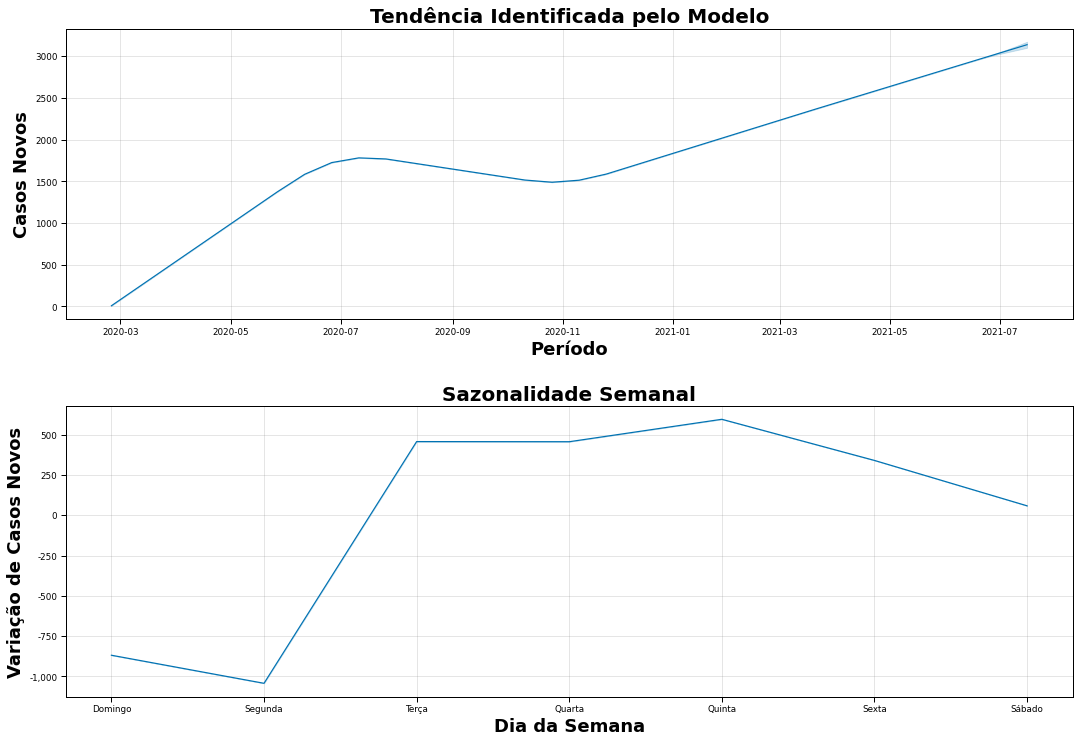

In [86]:
grafico = modelo.plot_components(previsao,figsize=(15,10));
eixos = grafico.get_axes()
eixos[0].set_title('Tendência Identificada pelo Modelo',
                   fontsize = 20,
                   fontweight = 'bold')
eixos[0].set_ylabel('Casos Novos',fontsize=18,fontweight='bold')
eixos[0].set_xlabel('Período',fontsize=18,fontweight='bold')
eixos[1].set_title('Sazonalidade Semanal',
                   fontsize = 20,
                   fontweight = 'bold')
eixos[1].set_ylabel('Variação de Casos Novos',fontsize=18,fontweight='bold')
eixos[1].set_xlabel('Dia da Semana',fontsize=18,fontweight='bold')
eixos[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
eixos[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.subplots_adjust(hspace=0.3)
plt.show()

#### **Desafio - Fazer a Previsão para os Casos Acumulados**
---

Para isso vou adaptar a função que foi criada no desafio anterior para realizar todos os passos usando a coluna 'Casos".

In [87]:
def proj_casos(dias: int):
    df_desafio_02 = pd.DataFrame()
    df_desafio_02['ds'] = dados_spc['datahora'][:(dados_spc.shape[0] - dias)]
    df_desafio_02['y'] = dados_spc['casos'][:(dados_spc.shape[0] - dias)]
    modelo_desafio_02 = Prophet()
    modelo_desafio_02.fit(df_desafio_02)
    df_desafio_02_futuro = modelo_desafio_02.make_future_dataframe(periods = dias)
    prev_desafio_02 = modelo_desafio_02.predict(df_desafio_02_futuro)
    df_desafio_02_teste = pd.DataFrame()
    df_desafio_02_teste['ds'] = dados_spc['datahora'][(dados_spc.shape[0] - dias):]
    df_desafio_02_teste['y'] = dados_spc['casos'][(dados_spc.shape[0] - dias):]
    modelo_desafio_02.plot(prev_desafio_02,
                        xlabel = 'Data',
                        ylabel = 'Casos Totais',
                        figsize = (15,10));
    plt.plot(df_desafio_02_teste['ds'],
             df_desafio_02_teste['y'],
             '.r')
    modelo_desafio_02.plot_components(prev_desafio_02,figsize=(15,10))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


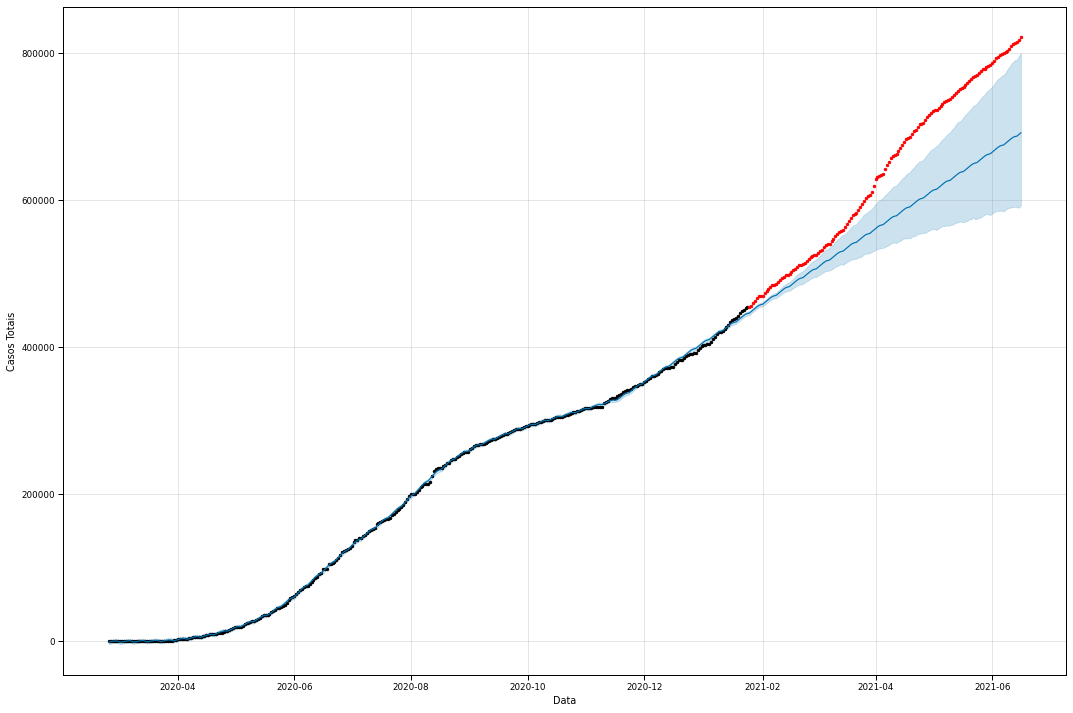

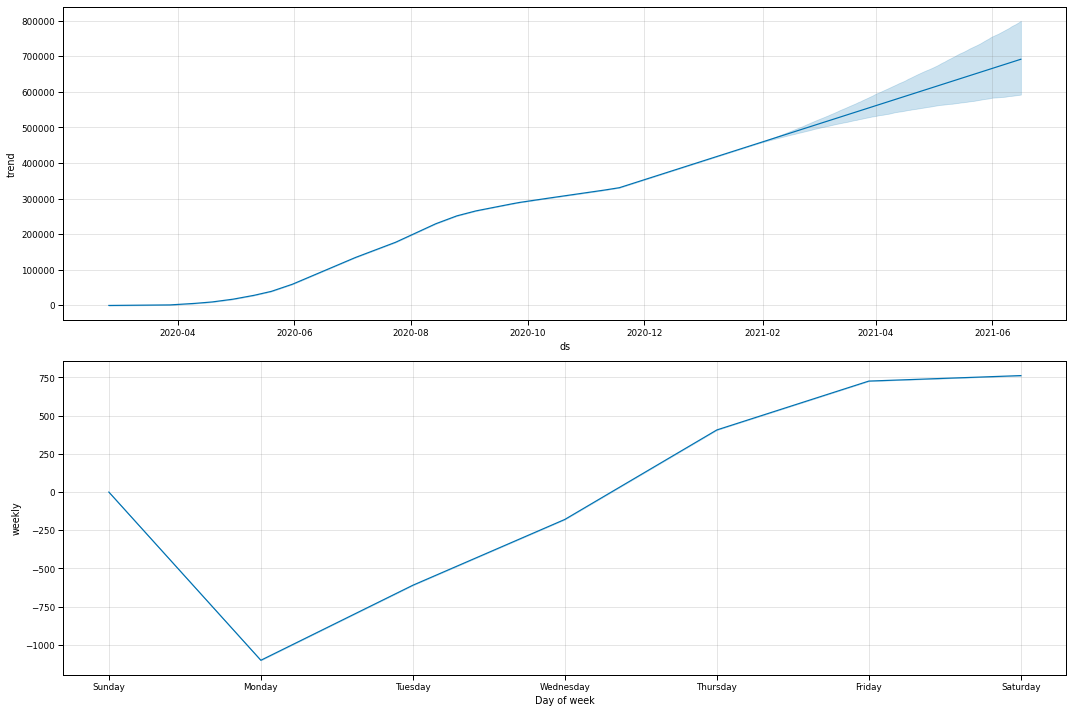

In [88]:
proj_casos(regra_70_30)

O que achei mais interessante nesse gráfico da projeção de casos totais é como a curva projetada se desprende dos dados reais, enquanto a projeção de casos novos não parecia estar tão divergente assim.

### **O que aprendemos nessa aula?**
---

>* Vimos as primeiras previsões com o **Facebook Prophet**;
* Fizemos a decomposição de séries temporais.



## **Aula 03 - Mudança de Tendência**
---


### Aula 03 - Vídeo 01 - Mudança de Tendência e *Changepoints*

Agora que já fizemos um uso inicial do **Prophet**, vimos que nosso modelo não tem um índice de acerto muito bom e também fizemos a decomposição do modelo de previsão que ele gerou em tendência e sazonalidade semanal, vamos verificar o que mais podemos melhorar em nossas previsões.

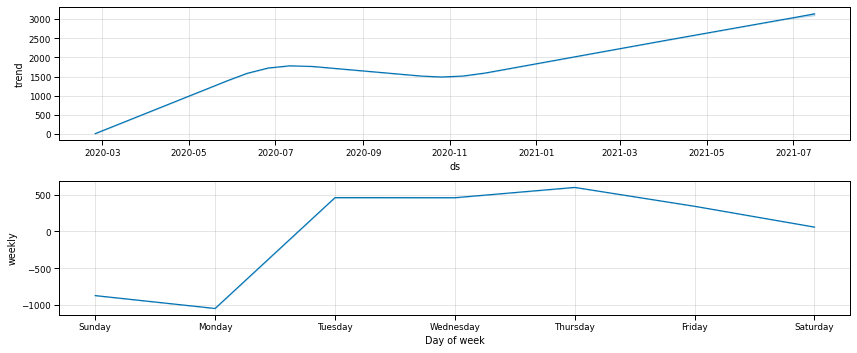

In [89]:
modelo.plot_components(previsao,figsize=(12,5));

In [90]:
from fbprophet.plot import add_changepoints_to_plot

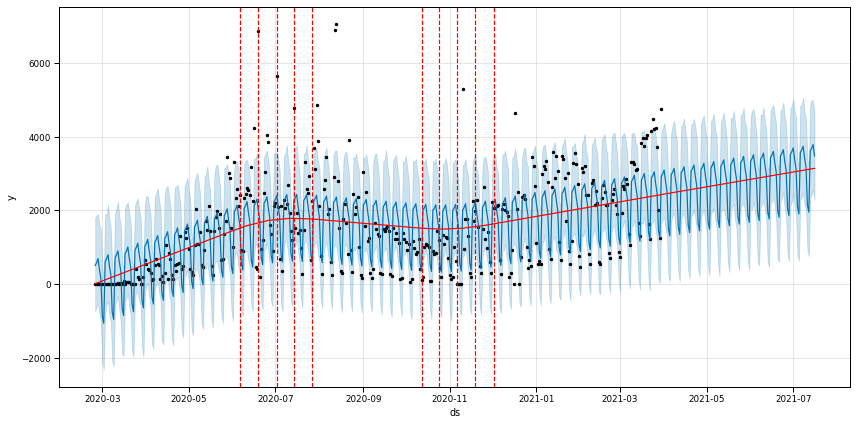

In [91]:
fig = modelo.plot(previsao, figsize=(12,6))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

#### **Desafio - Fazer a Previsão para os Casos Acumulados com Crescimento Logístico**
---

Usar o parâmetro **```growth = 'logistic'```** na criação do modelo do **Prophet**.

O uso desse parâmetro demanda a inclusão de outras duas colunas em nossos *DataFrames* (de treino e de projeção). São elas:
* **```cap```** - é o teto que a nossa projeção pode alcançar. A população total, por exemplo. Em uma cidade de 100 mil habitantes não faz sentido ter um modelo que preveja 150 mil casos. Esse parâmetro é obrigatório e pode variar ao longo da Série Temporal (prevendo um crescimento da população, por exemplo.
* **```floor```** - é o mínimo que a projeção pode alcançar, caso aponte uma tendência de queda. Não podemos ter casos negativos, por exemplo. Esse parâmetro é opcional.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


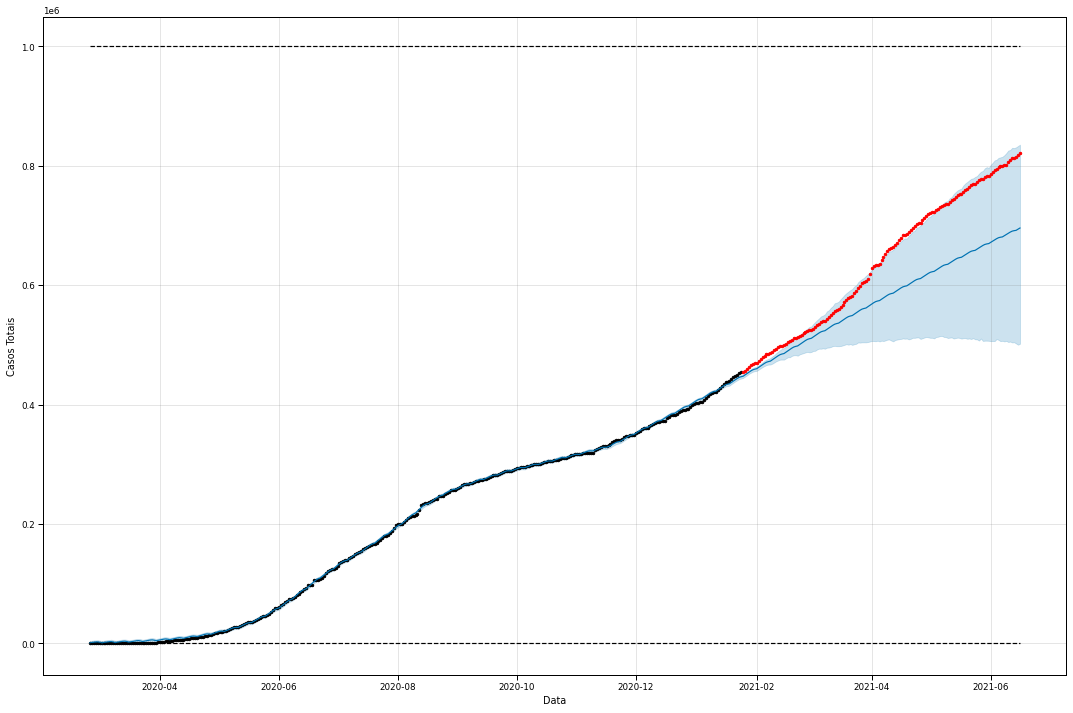

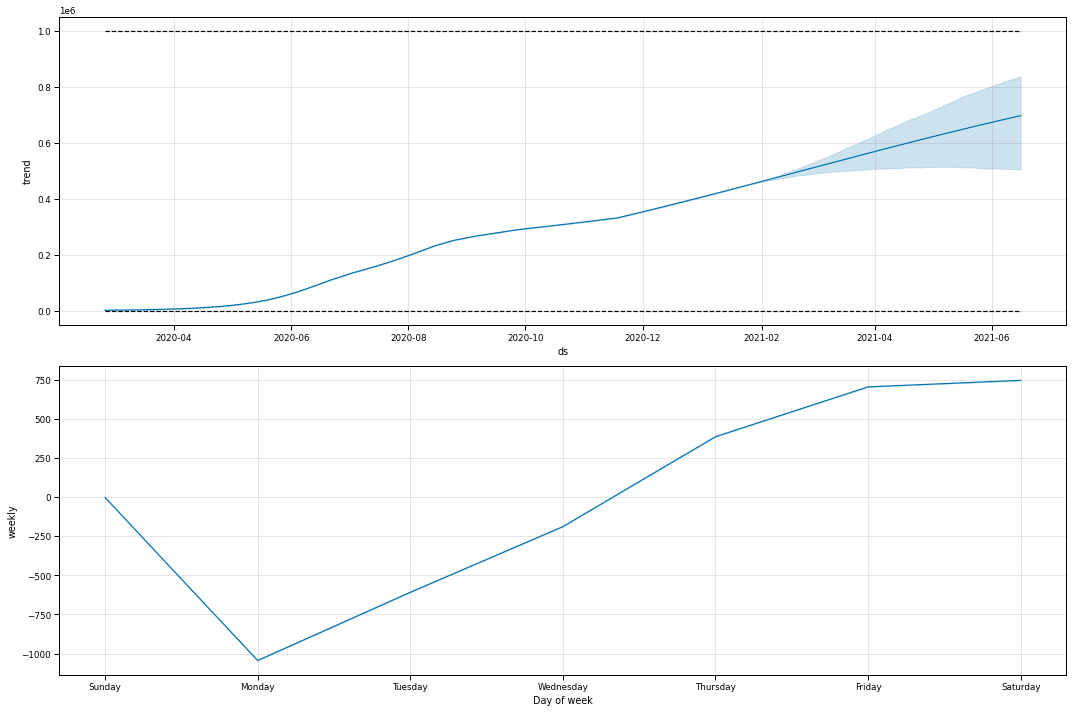

In [92]:
dias = regra_70_30
df_desafio_log = pd.DataFrame()
df_desafio_log['ds'] = dados_spc['datahora'][:(dados_spc.shape[0] - dias)]
df_desafio_log['y'] = dados_spc['casos'][:(dados_spc.shape[0] - dias)]
df_desafio_log['cap'] = 1000000
df_desafio_log['floor'] = 0
modelo_desafio_log = Prophet(growth = 'logistic')
modelo_desafio_log.fit(df_desafio_log)
df_desafio_log_futuro = modelo_desafio_log.make_future_dataframe(periods = dias)
df_desafio_log_futuro['cap'] = 1000000
df_desafio_log_futuro['floor'] = 0
prev_desafio_log = modelo_desafio_log.predict(df_desafio_log_futuro)
df_desafio_log_teste = pd.DataFrame()
df_desafio_log_teste['ds'] = dados_spc['datahora'][(dados_spc.shape[0] - dias):]
df_desafio_log_teste['y'] = dados_spc['casos'][(dados_spc.shape[0] - dias):]
modelo_desafio_log.plot(prev_desafio_log,
                    xlabel = 'Data',
                    ylabel = 'Casos Totais',
                    figsize = (15,10));
plt.plot(df_desafio_log_teste['ds'],
            df_desafio_log_teste['y'],
            '.r')
modelo_desafio_log.plot_components(prev_desafio_log,figsize=(15,10));

Fazendo a projeção de casos totais com o modelo logístico, apesar de ainda termos uma realidade superior ao projetado, já temos o realizado (dados de teste) dentro do intervalo de confiança projetado pelo modelo, apesar de estar bem dentro do limite superior.

Testei usando **```cap```** diferentes, desde 900k até 2 MM e vi que a principal variação no modelo resultante é o alargamento do intervalo de confiança. Deixei no notebook a versão usando a separação dos dados em 70% / 30% com 1 MM de **```cap```**;

#### De volta para a aula...
---

>**Karoline:** O legal de você falar do crescimento logístico - ele é uma curva em "S" que você mostrou para nós. Ele tem um nome, é um sigmoide, então vocês também podem procurar um pouco sobre regressão logística, crescimento logístico, curva logística, tem bastante coisa aí para ver.
>
>O legal é que com a vacina - a maior importância da vacina é que as pessoas parem de morrer e depois disso é que consigamos controlar essa doença e ela vire apenas um outro tipo de gripe, não sei exatamente, não sou da área, mas que torne-se algo controlável e que as pessoas até peguem, mas que elas não morram nem parem no hospital por conta disso.
>
>O sigmoide parece um "S" esticado, então ele está embaixo, não tem ninguém com essa doença e de repente vai crescendo, crescimento exponencial, e aí a ideia é que a última curva do "S" seja muito próxima de uma reta, ou mesmo uma reta horizontal no caso. Essa parte onde a reta vira horizontal significa que atingimos o platô dessa curva, é completamente controlado.
>
>A doença ainda existe, mas está em um ambiente controlado, as pessoas não morrem, as pessoas estão vacinadas. Então é isso que esperamos dessa doença, estatisticamente, que uma hora as pessoas parem de morrer por conta disso.
>
>E se plotarmos esse tipo de dado, se analisarmos e prevermos esse tipo de dado, esperamos que daqui a alguns meses a curva seja próxima de um sigmoide. Não é, Allan?

Vamos trabalhar então com os parâmetros do **Prophet** para tentar melhorar nosso modelo de previsão.

O primeiro parâmetro seria o número máximo de *changepoints*. Por padrão o **Prophet** trabalha com 25 *changepoints*. Vamos alterar para 50. Mas isso sozinho não deve alterar muito nossa previsão, pois como vimos no gráfico acima o modelo está nos mostrando apenas 10 *changepoints*, que são as linhas verticais vermelhas.



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


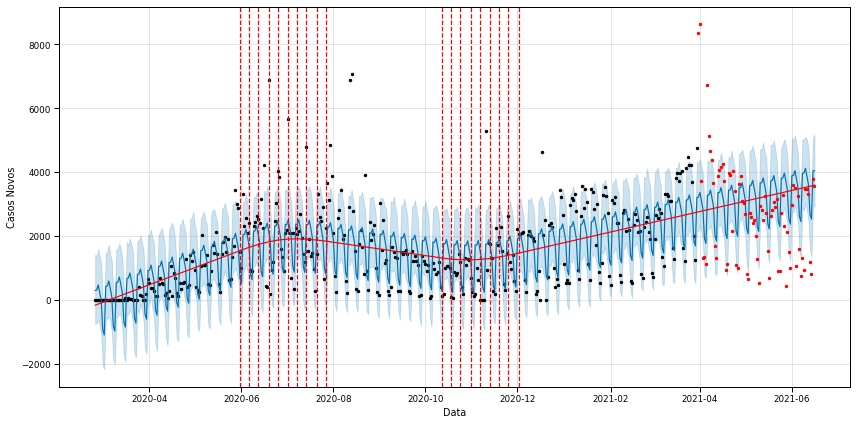

In [93]:
df_aula3 = pd.DataFrame()
df_aula3['ds'] = dados_spc['datahora'][:400]
df_aula3['y'] = dados_spc['casos_novos'][:400]
modelo_aula3 = Prophet(n_changepoints=50)
modelo_aula3.fit(df_aula3)
df_aula3_futuro = modelo_aula3.make_future_dataframe(periods = dados_spc.shape[0]-400)
prev_aula3 = modelo_aula3.predict(df_aula3_futuro)
df_aula3_teste = pd.DataFrame()
df_aula3_teste['ds'] = dados_spc['datahora'][400:]
df_aula3_teste['y'] = dados_spc['casos_novos'][400:]
fig_a3 = modelo_aula3.plot(prev_aula3,
                    xlabel = 'Data',
                    ylabel = 'Casos Novos',
                    figsize = (12,6));
a = add_changepoints_to_plot(fig_a3.gca(), modelo_aula3, prev_aula3)
plt.plot(df_aula3_teste['ds'],
            df_aula3_teste['y'],
            '.r')

Podemos ver que com o máximo de *changepoints* alterado para 50 o **Prophet** nos mostra 19 linhas vermelhas (o que eu acho estranho, pois o parâmetro antes era 25...). Pelo que entendi da documentação, os *changepoints* são colocados nos 80% iniciais da série de dados.

Para tentar melhorar o modelo, podemos trabalhar com a flexibilidade dos *changepoints*. Isso é parametrizado através do **```changepoint_prior_scale```**. Por *default*, o valor é 0.05. Vamos exagerar na diferença é usar 10 em nosso estudo para verificar o efeito.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


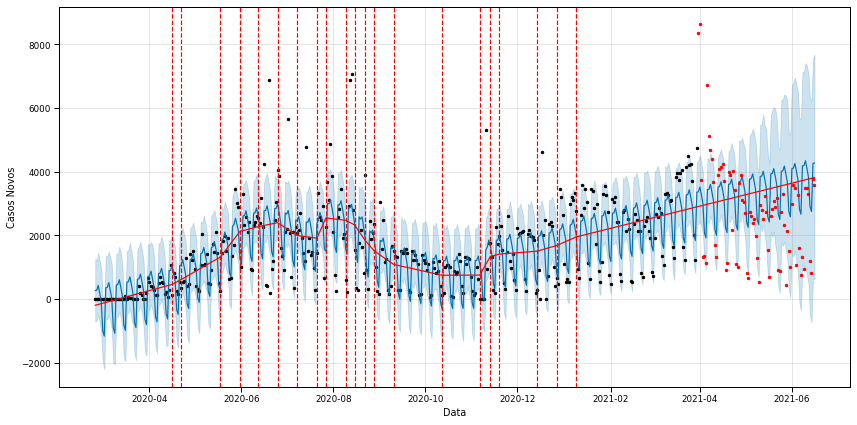

In [94]:
modelo_aula3 = Prophet(n_changepoints = 50,
                       changepoint_prior_scale = 10)
modelo_aula3.fit(df_aula3)
df_aula3_futuro = modelo_aula3.make_future_dataframe(periods = dados_spc.shape[0]-400)
prev_aula3 = modelo_aula3.predict(df_aula3_futuro)

fig_a3 = modelo_aula3.plot(prev_aula3,
                    xlabel = 'Data',
                    ylabel = 'Casos Novos',
                    figsize = (12,6));
a = add_changepoints_to_plot(fig_a3.gca(), modelo_aula3, prev_aula3)
plt.plot(df_aula3_teste['ds'],
            df_aula3_teste['y'],
            '.r')

Esse conjunto de alterações aumentou bastante o número de *changepoints* e deixou nossa curva de tendência (em vermelho) bem mais "sinuosa".

É interessante perceber também como aumentou o grau de incerteza do nosso modelo, como podemos ver pela abertura da amplitude da área azul clara na parte de previsão do nosso modelo (de 2021/05 em diante).

Nesse ponto é necessário tomar cuidado com o **overfitting**, ou seja, quando adequamos os parâmetros do nosso modelo para conseguir conter o maior número de pontos da base de treino e acabamos deixando-o inadequado para fazer previsões que fujam um pouco da repetição do passado.

Vamos tentar com uma alteração do parâmetro **```changepoint_prior_scale```** para o outro extremo. Se temos por padrão o valor 0.05 e já vimos o que acontece usando 10, vamos agora testar usando 0.0005.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


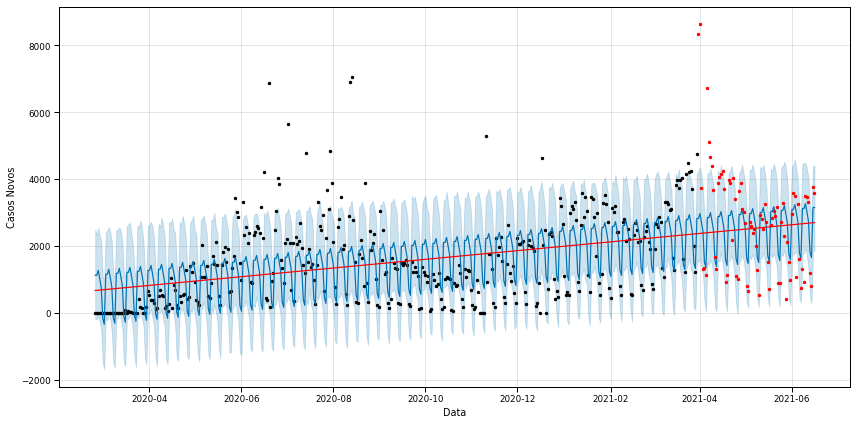

In [95]:
modelo_aula3 = Prophet(n_changepoints = 50,
                       changepoint_prior_scale = 0.0005)
modelo_aula3.fit(df_aula3)
df_aula3_futuro = modelo_aula3.make_future_dataframe(periods = dados_spc.shape[0]-400)
prev_aula3 = modelo_aula3.predict(df_aula3_futuro)

fig_a3 = modelo_aula3.plot(prev_aula3,
                    xlabel = 'Data',
                    ylabel = 'Casos Novos',
                    figsize = (12,6));
a = add_changepoints_to_plot(fig_a3.gca(), modelo_aula3, prev_aula3)
plt.plot(df_aula3_teste['ds'],
            df_aula3_teste['y'],
            '.r')

Podemos ver que reduzindo ainda mais a flexibilidade, o modelo fica sem nenhum *changepoint*, com uma tendência linear única, sem quebras de inclinação gerando novas retas.

Outra possibilidade é usar como parâmetro datas específicas que indicaremos como sendo os *changepoints* que o modelo irá usar. Nesse caso o modelo não vai gerar novos *changepoints* e pode ser que não gere alteração da curva de tendência nas datas apontadas.

Vamos fazer um exemplo usando a data de 31/dez/2020 como único *changepoint*.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0   2020-12-31
Name: ds, dtype: datetime64[ns]


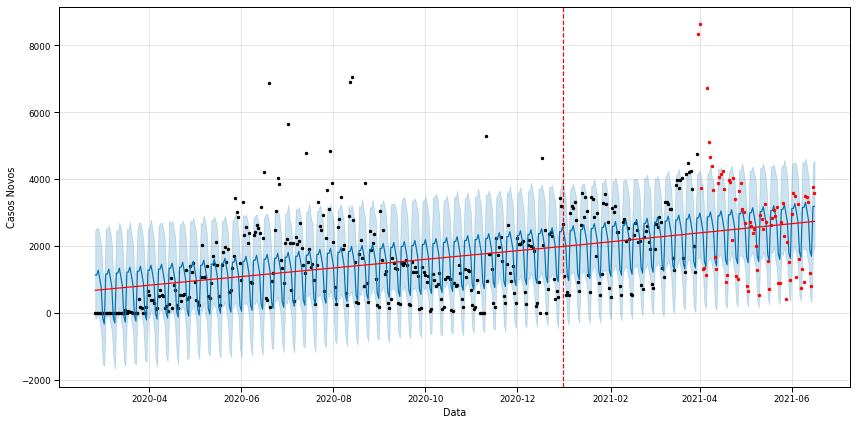

In [96]:
modelo_aula3 = Prophet(changepoints=['2020-12-31'])

modelo_aula3.fit(df_aula3)
df_aula3_futuro = modelo_aula3.make_future_dataframe(periods = dados_spc.shape[0]-400)
prev_aula3 = modelo_aula3.predict(df_aula3_futuro)

fig_a3 = modelo_aula3.plot(prev_aula3,
                    xlabel = 'Data',
                    ylabel = 'Casos Novos',
                    figsize = (12,6));
a = add_changepoints_to_plot(fig_a3.gca(), modelo_aula3, prev_aula3)
plt.plot(df_aula3_teste['ds'],
            df_aula3_teste['y'],
            '.r')

print(modelo_aula3.changepoints)

Podemos ver que na data escolhida não houve alteração de tendência, deixando a mesma reta única indicando a tendência projetada pelo modelo.

Uma alternativa é rodar o modelo, colocar em uma lista os *changepoints* automáticos, adicionar nessa lista os *changepoints* personalizados e rodar o modelo novamente.

In [97]:
print(modelo.changepoints)

13    2020-03-09
26    2020-03-22
38    2020-04-03
51    2020-04-16
64    2020-04-29
77    2020-05-12
89    2020-05-24
102   2020-06-06
115   2020-06-19
128   2020-07-02
140   2020-07-14
153   2020-07-27
166   2020-08-09
179   2020-08-22
191   2020-09-03
204   2020-09-16
217   2020-09-29
230   2020-10-12
242   2020-10-24
255   2020-11-06
268   2020-11-19
281   2020-12-02
293   2020-12-14
306   2020-12-27
319   2021-01-09
Name: ds, dtype: datetime64[ns]


Outro parâmetro interessante é o **```changepoint_range```**. Para evitar que mudanças no final da série de dados tenham grandes impactos no modelo, o **Prophet**, por padrão, distribui os *changepoints* nos 80% iniciais da série de dados de treino. Caso tenhamos algum ponto significativo de inflexão nos 20% finais podemos alterar esse percentual (ou incluir forçadamente a data, como vimos acima).

#### **Desafio - Usando o** **```diff()```,** **Identificar Possíveis** ***Changepoints***
---

Usar o gráfico de barras e tentar identificar sequência de barras que indiquem mudanças de tendência ou critérios para isso e comparar com os *changepoints* identificados pelo **Prophet**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



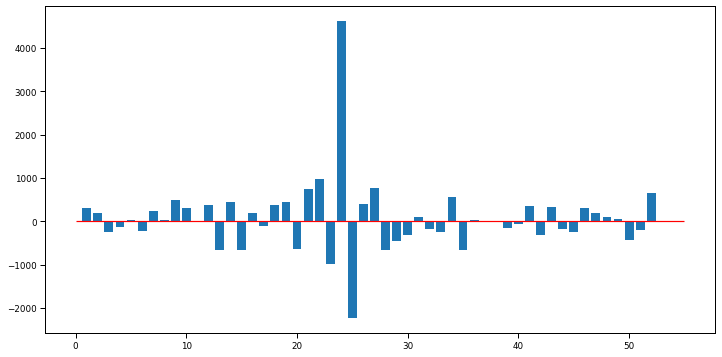

In [98]:
dados_spc['Semana'] = pd.DatetimeIndex(dados_spc['datahora']).week

plt.bar(dados_spc.groupby(by=dados_spc['Semana']).sum().index,dados_spc.groupby(by=dados_spc['Semana']).sum()['taxa_crescimento_casos'])
plt.hlines(y=0,xmin=0, xmax=55, colors='r')

Como podemos ver no gráfico de barras da taxa de crescimento de casos agrupada por semana, não chegamos a ter nenhuma sequência de mais de 4 semanas com a taxa de crescimento positiva ou negativa, sendo que o mais comum é a alternância de semanas positivas com semanas negativas.

Isso provavelmente ocorre pela falta de notificação imediata dos casos, acumulando notificações e deixando a informação de surgimento de um caso novo desencontrada com a realidade.

Dessa forma, o gráfico de barras não é uma boa maneira de identificar *changepoints* nessa série de dados.

#### **Desafio - Desenvolver uma Função para Rodar o Modelo Automaticamente**
---

Esse ponto já foi feito anteriormente, vou verificar se tem algo para melhorar na função em termos de passagem de parâmetros, por exemplo.

In [99]:
def profeta(df_func, var_func: str, dias: int):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = df_func['datahora'][:(df_func.shape[0] - dias)]
    df_desafio['y'] = df_func[var_func][:(df_func.shape[0] - dias)]
    modelo_desafio = Prophet()
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = df_func['datahora'][(df_func.shape[0] - dias):]
    df_desafio_teste['y'] = df_func[var_func][(df_func.shape[0] - dias):]
    graf_func = modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = var_func,
                        figsize = (15,10));
    graf_func2 = plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
    graf_func3 = modelo_desafio.plot_components(prev_desafio)
    return graf_func, graf_func2, graf_func3

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


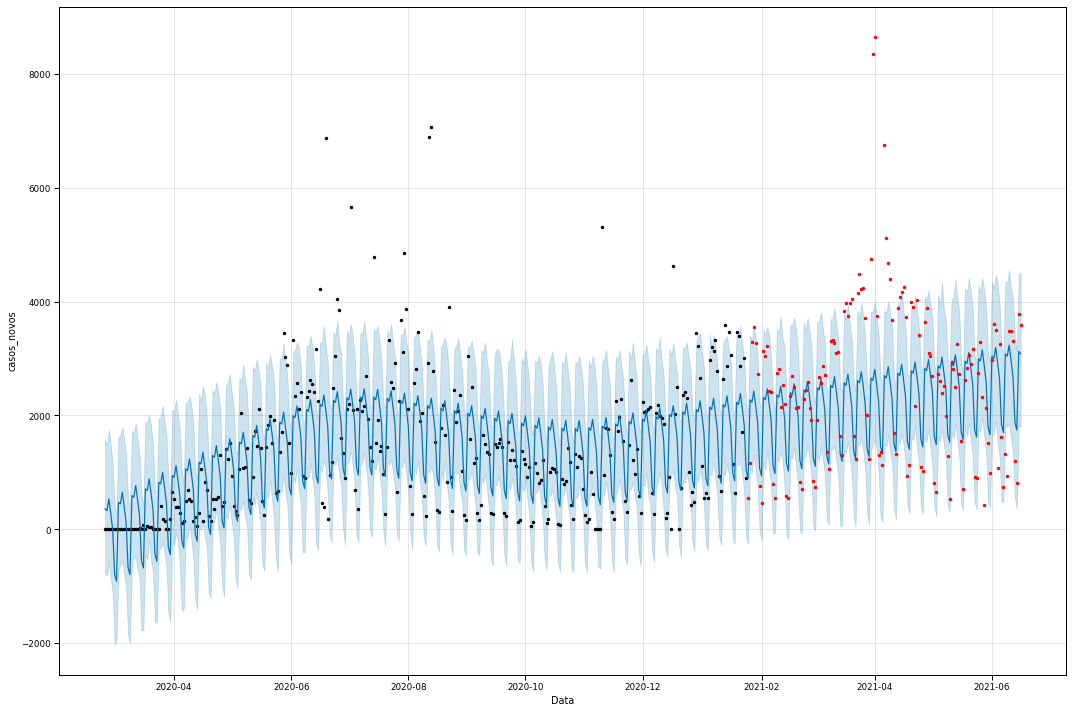

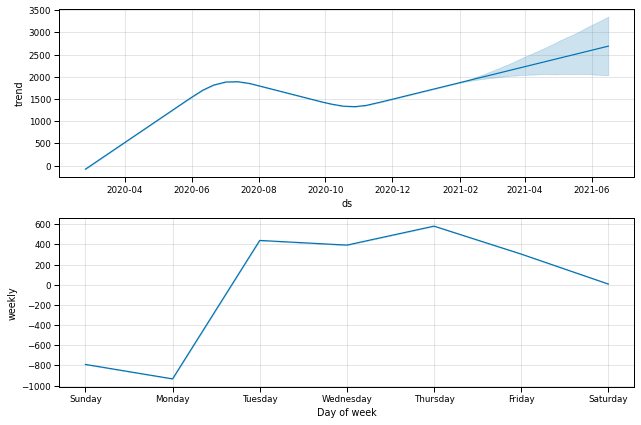

In [100]:
graf, graf2, graf3 = profeta(dados_spc, 'casos_novos', regra_70_30)

### **O que aprendemos nessa aula?**
---

>* Curva com o crescimento logístico;
* Mudança de tendência em uma série temporal;
* Como decidir se houve mudança de tendência através de um gráfico de barras.



## **Aula 04 - Feriados e Sazonalidade**
---


### Aula 04 - Vídeo 01 - Feriados e Sazonalidades nas Séries Temporais

Vamos retomar os gráficos de barras que foram feitos mostrando a quantidade de casos novos notificados diariamente para a cidade de São Paulo Capital, somente nos meses de janeiro e fevereiro de 2021.



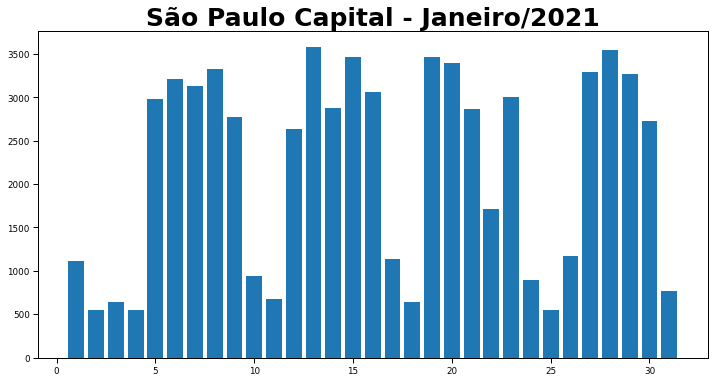

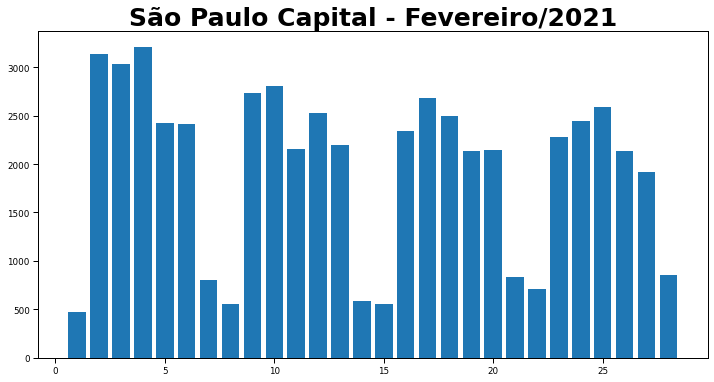

In [101]:
plt.bar(np.linspace(1,31,31),dados_spc_202101['casos_novos'])
plt.title('São Paulo Capital - Janeiro/2021', fontsize = 25, fontweight = 'bold')
plt.show()
plt.bar(np.linspace(1,28,28),dados_spc_202102['casos_novos'])
plt.title('São Paulo Capital - Fevereiro/2021', fontsize = 25, fontweight = 'bold')
plt.show()

Já havíamos notado a sazonalidade dos dias de semana vs finais de semana, que apresentam número menor de notificações.

Mas temos também números menores em alguns outros dias, que coincidem com os feriados do município.

**OBSERVAÇÃO:** Diferente do que foi colocado no vídeo da aula, cabe destacar que as notificações aparentam ser feitas sempre no dia posterior. Sendo assim, o efeito do menor número de casos em sábados e domingos aparece nos dados de domingos e 2ª-feira. Isso também ocorre com os feriados, tendo seu efeito sempre no dia seguinte.

Em fevereiro não tivemos feriados, somente os finais de semana. Já em janeiro, podemos perceber além dos finais de semana, notificações baixas referentes aos dias 31/dez, 01 e 25/jan.

Vamos usar a funcionalidade do **Facebook Prophet** que adiciona o calendário de feriados ao modelo que está sendo analisado, é a **```add_country_holidays```**, mas vamos fazer isso já dentro da nossa função **```profeta```**, que foi desenvolvida como desafio da aula passada, gerando a **```profeta_v2```**.

In [102]:
def profeta_v2(df_func, var_func: str, dias: int):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = df_func['datahora'][:(df_func.shape[0] - dias)]
    df_desafio['y'] = df_func[var_func][:(df_func.shape[0] - dias)]
    modelo_desafio = Prophet(changepoint_prior_scale = 10)
    modelo_desafio.add_country_holidays('BR')
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = df_func['datahora'][(df_func.shape[0] - dias):]
    df_desafio_teste['y'] = df_func[var_func][(df_func.shape[0] - dias):]
    graf_func = modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = var_func,
                        figsize = (15,10));
    graf_func2 = plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
    graf_func3 = modelo_desafio.plot_components(prev_desafio)
    graf_func4 = plot_plotly(modelo_desafio, prev_desafio)
    graf_func5 = plot_components_plotly(modelo_desafio, prev_desafio)
    return graf_func, graf_func2, graf_func3, graf_func4, graf_func5

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


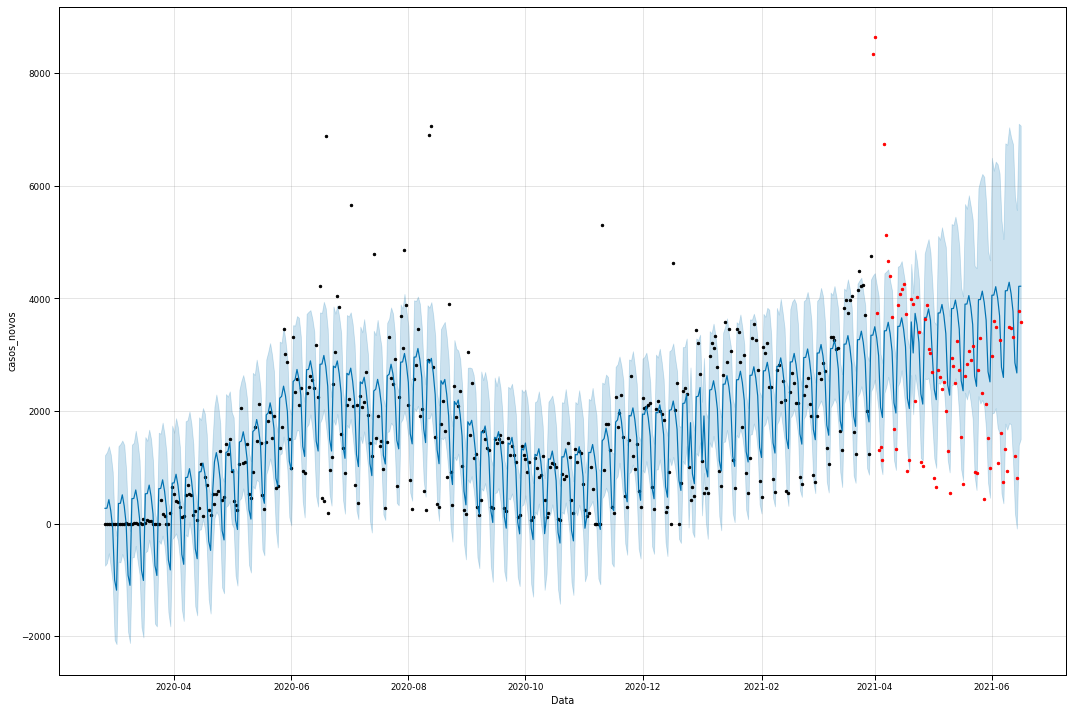

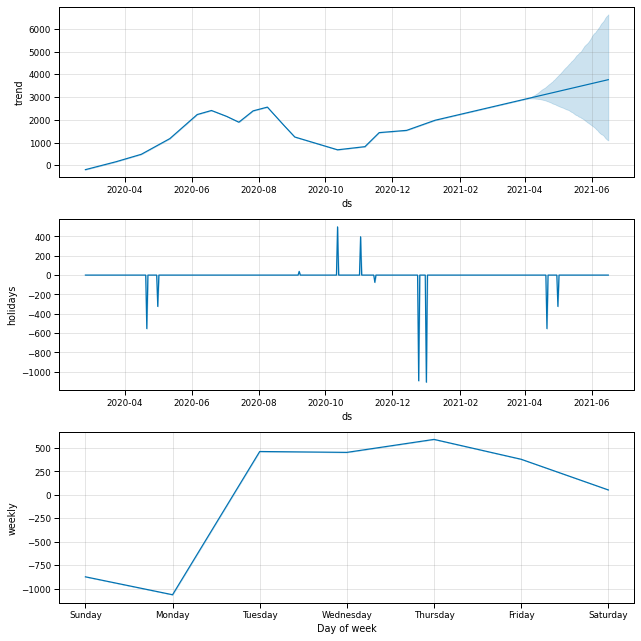

In [103]:
graf, graf2, graf3, graf4, graf5 = profeta_v2(dados_spc, 'casos_novos', 78)

O problema é que isso agrega ao modelo somente os feriados federais e estamos fazendo uma análise de São Paulo Capital. Além disso, em função da pandemia, tivemos vários feriados que tiveram suas datas alteradas ao longo de 2020 e 2021.

Para deixar nosso modelo mais adequado à realidade, vamos criar listas com os feriados de SP e passar essa informação ao **Prophet**, ainda utilizando a função **```profeta_v2```**.

In [104]:
feriados_sp_2020= ['2020-02-25','2020-02-26','2020-04-10','2020-04-21',
                   '2020-05-01','2020-05-20','2020-05-21','2020-05-22',
                   '2020-05-25','2020-06-11','2020-09-07','2020-10-12',
                   '2020-11-02','2020-11-15','2020-12-25','2020-12-31']

feriados_sp_2021= ['2021-01-01','2021-01-25','2021-02-15','2021-02-16',
                   '2021-02-17','2021-03-26','2021-03-29','2021-03-30',
                   '2021-03-31','2021-04-01','2021-04-02','2021-4-21',
                   '2021-05-01','2021-06-03','2021-07-09','2021-09-07',
                   '2021-10-12','2021-10-28','2021-11-02','2021-11-15',
                   '2021-12-25','2021-12-31']

feriados_sp_2020 = pd.DataFrame({'holiday': 'sp_2020', 'ds': pd.to_datetime(feriados_sp_2020)})
feriados_sp_2021 = pd.DataFrame({'holiday': 'sp_2021', 'ds': pd.to_datetime(feriados_sp_2021)})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [105]:
def profeta_v2(df_func, var_func: str, dias: int, season='additive'):
    df_desafio = pd.DataFrame()
    df_desafio['ds'] = df_func['datahora'][:(df_func.shape[0] - dias)]
    df_desafio['y'] = df_func[var_func][:(df_func.shape[0] - dias)]
    modelo_desafio = Prophet(changepoint_prior_scale = 10, holidays = feriados,
                             seasonality_mode = season)
    modelo_desafio.fit(df_desafio)
    df_desafio_futuro = modelo_desafio.make_future_dataframe(periods = dias)
    prev_desafio = modelo_desafio.predict(df_desafio_futuro)
    df_desafio_teste = pd.DataFrame()
    df_desafio_teste['ds'] = df_func['datahora'][(df_func.shape[0] - dias):]
    df_desafio_teste['y'] = df_func[var_func][(df_func.shape[0] - dias):]
    graf_func = modelo_desafio.plot(prev_desafio,
                        xlabel = 'Data',
                        ylabel = var_func,
                        figsize = (15,10));
    graf_func2 = plt.plot(df_desafio_teste['ds'],
             df_desafio_teste['y'],
             '.r')
    graf_func3 = modelo_desafio.plot_components(prev_desafio)
    graf_func4 = plot_plotly(modelo_desafio, prev_desafio)
    graf_func5 = plot_components_plotly(modelo_desafio, prev_desafio)
    return graf_func, graf_func2, graf_func3, graf_func4, graf_func5, df_desafio, prev_desafio

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


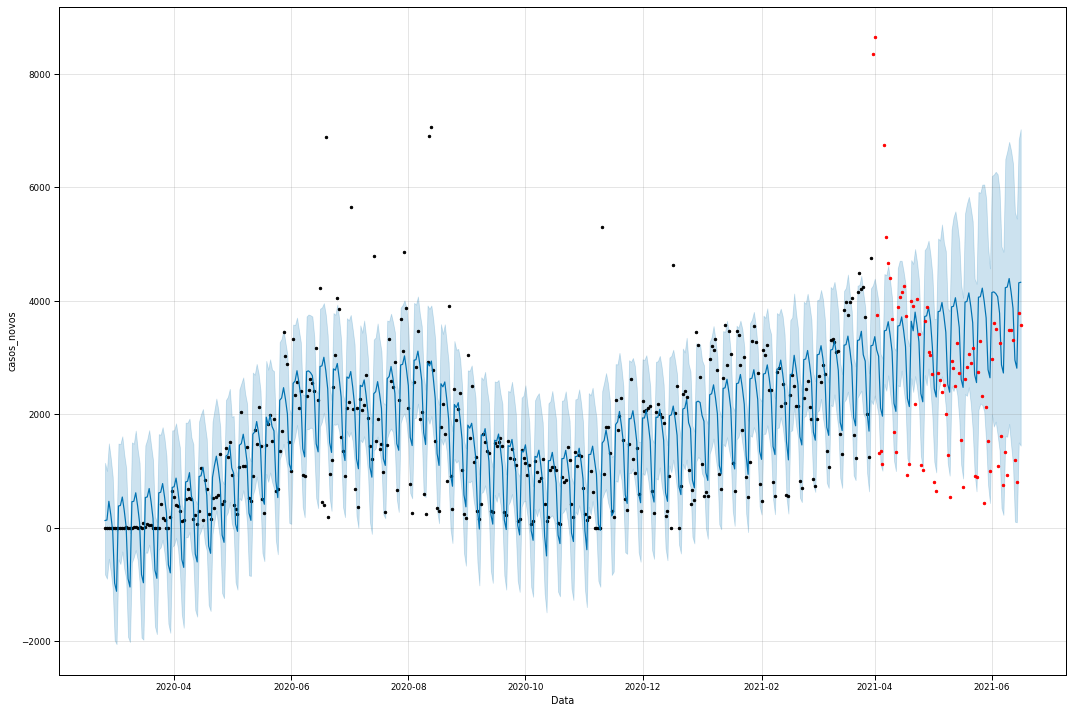

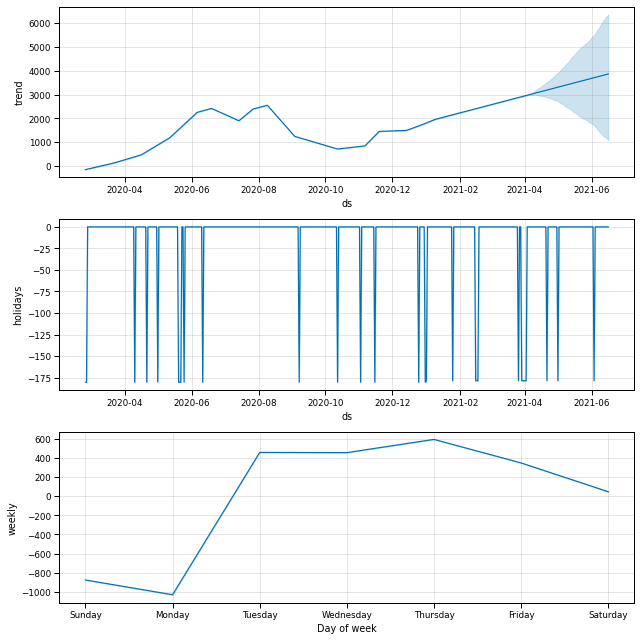

In [106]:
graf, graf2, graf3, graf4, graf5, df, prev = profeta_v2(dados_spc, 'casos_novos', 78)

Agora podemos ver que o modelo está considerando as alterações trazidas por todos os feriados, com a consequente redução de casos notificados que tínhamos observado antes quando analisamos janeiro de 2021 através do gráfico de barras.

Diferentemente do que foi visto na aula gravada, o modelo deu o mesmo peso para todos os feriados, com uma redução de casos novos.

Nesse ponto a **Karol** chama a atenção para o fato de que a redução que conseguimos ver é de *casos notificados*, o que pode representar na realidade uma redução de notificações sem haver alterações no número de contaminações (as notificações podem só ocorrer no próximo dia útil, por exemplo).

Uma outra hipótese levantada por ela é de que poderia haver redução de contaminações em feriados, mas é uma hipótese que descarto logo pois o início dos sintomas e a consequente notificação não é instantânea, ou seja, eventuais contaminações nos feriados só surgem alguns dias depois.


Apesar do **Prophet** ter enxergado e incorporado ao modelo a sazonalidade semanal, podemos ter outros tipos de sazonalidade.

Podemos ter sazonalidade *aditiva* (que é o *default* do **Prophet**) e podemos ter a sazonalidade *multiplicativa*. Isso é passado através do parâmetro **```seasonality_mode```**.

Mas antes de fazer alterações nesse parâmetro, precisamos ter uma forma de verificar a acuracidade do nosso modelo. Até agora estávamos confiando apenas no que víamos nos gráficos, mas precisamos de algo mais objetivo, para não depender da interpretação de quem está olhando a plotagem.

Para isso vamos trabalhar com a biblioteca **```sklearn```** e suas métricas utilizadas para avaliar modelos de *machine learning*.

In [107]:
from sklearn.metrics import mean_absolute_error

In [108]:
print('Erro Médio Absoluto',mean_absolute_error(df.y,prev.yhat[:400])) # restringe às 400 linhas iniciais para que os dados tenham o mesmo tamanho

Erro Médio Absoluto 537.0644833770037


Esse erro médio absoluto apontado é uma primeira métrica a ser usada. Quanto mais próximo de ZERO, melhor o modelo.

Obtivemos o valor de 537,06 em nosso modelo atual, que usa a sazonalidade aditiva.

Vamos verificar como fica esse indicador se alterarmos a sazonalidade do nosso modelo para multiplicativa.

Para isso eu fiz uma alteração na função **```profeta_v2```** incluindo o tipo de sazonalidade como parâmetro opcional. Se não for passado nada, a função usa a sazonalidade aditiva, mas podemos passar o parâmetro *'multiplicative'* para alterar a forma que o modelo será montado.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 Erro Médio Absoluto 452.85886861634253


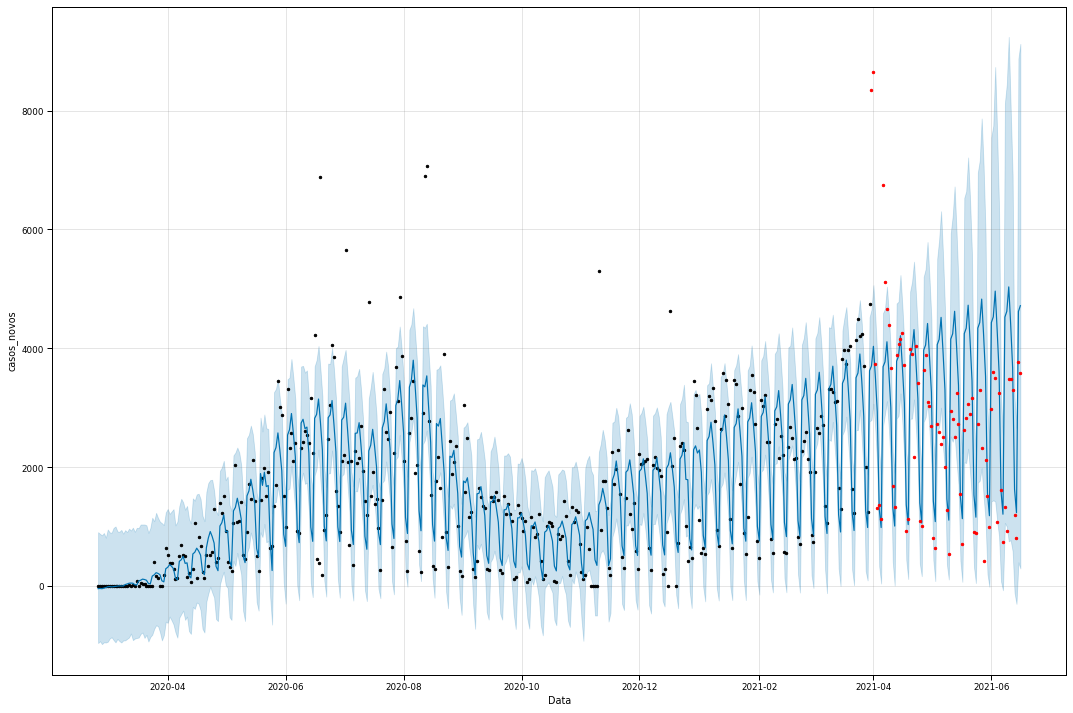

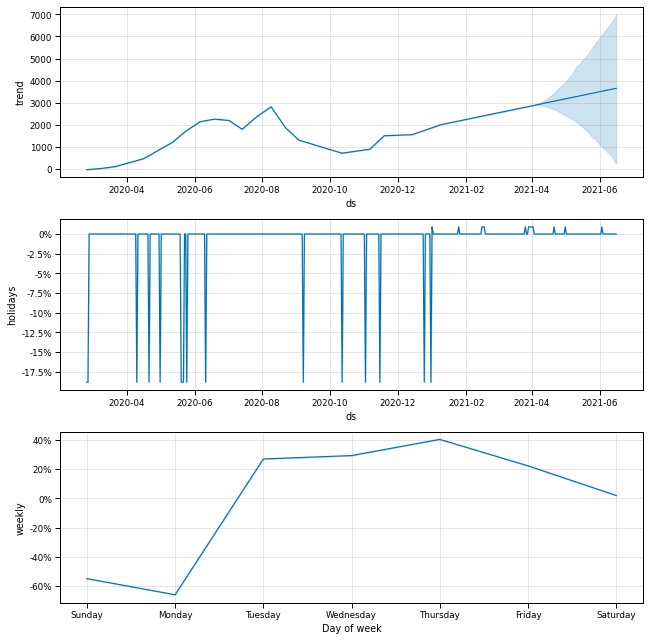

In [109]:
graf, graf2, graf3, graf4, graf5, df, prev = profeta_v2(dados_spc, 'casos_novos', 78, 'multiplicative')
print('\n Erro Médio Absoluto',mean_absolute_error(df.y,prev.yhat[:400]))

Podemos ver que o erro médio absoluto deste modelo caiu para 452,86, ou seja, melhoramos a adaptação aos nossos dados de treino.

Analisando o gráfico podemos perceber alterações nas amplitudes ao longo da série temporal. Até agosto/setembro temos semanas mais amplas, com maior variação. Mais para o final do ano de 2020, as semanas começam a ter menor amplitude, com fundos e topos mais próximos.

#### **Desafio - Plotar os Dados Reais (Pontos Pretos) em Linha**
---

A ideia é facilitar a comparação das curvas entre o modelo previsto (em azul) e os dados reais (em preto), ambos na forma de linhas.

#### **Desafio Extra - Utilizar Outras Métricas do** **```Scikitlearn```** **e Comparar Resultados**
---

### **O que aprendemos nessa aula?**
---

>* Efeito da sazonalidade e feriados em uma série temporal;
* Sazonalidade aditiva e sazonalidade multiplicativa;
* Previsões considerando sazonalidade e feriados com o **Facebook Prophet**.

